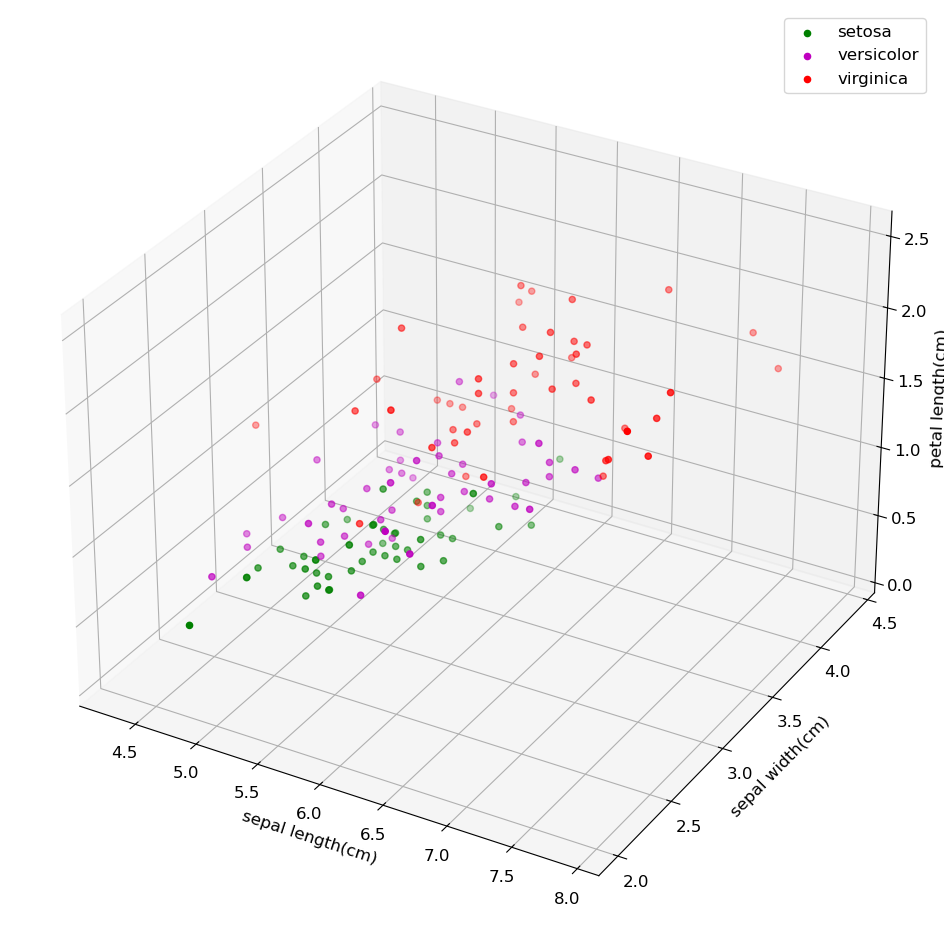

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size':12})
plt.rcParams['figure.figsize'] = [12, 12]

fisheriris_mat = io.loadmat("DATA/fisheriris.mat")
meas = fisheriris_mat['meas']

#print(np.unique(fisheriris_mat['species']))
uni_species = np.unique(fisheriris_mat['species'])
#print(uni_species[0])
#print(type(uni_species[0]))
#print(fisheriris_mat['species'][fisheriris_mat['species'] == uni_species[0]])
# print((fisheriris_mat['species'] == uni_species[0]).reshape(-1))
x1 = meas[(fisheriris_mat['species'] == uni_species[0]).reshape(-1),:]
x2 = meas[(fisheriris_mat['species'] == uni_species[1]).reshape(-1),:]
x3 = meas[(fisheriris_mat['species'] == uni_species[2]).reshape(-1),:]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x1[:,0], x1[:,1], x1[:,3], c='g', marker = 'o')
ax.scatter(x2[:,0], x2[:,1], x2[:,3], c='m', marker = 'o')
ax.scatter(x3[:,0], x3[:,1], x3[:,3], c='r', marker = 'o')
ax.legend([uni_species[0][0], uni_species[1][0], uni_species[2][0]])
ax.set_xlabel("sepal length(cm)")
ax.set_ylabel("sepal width(cm)")
ax.set_zlabel("petal length(cm)")

plt.show()

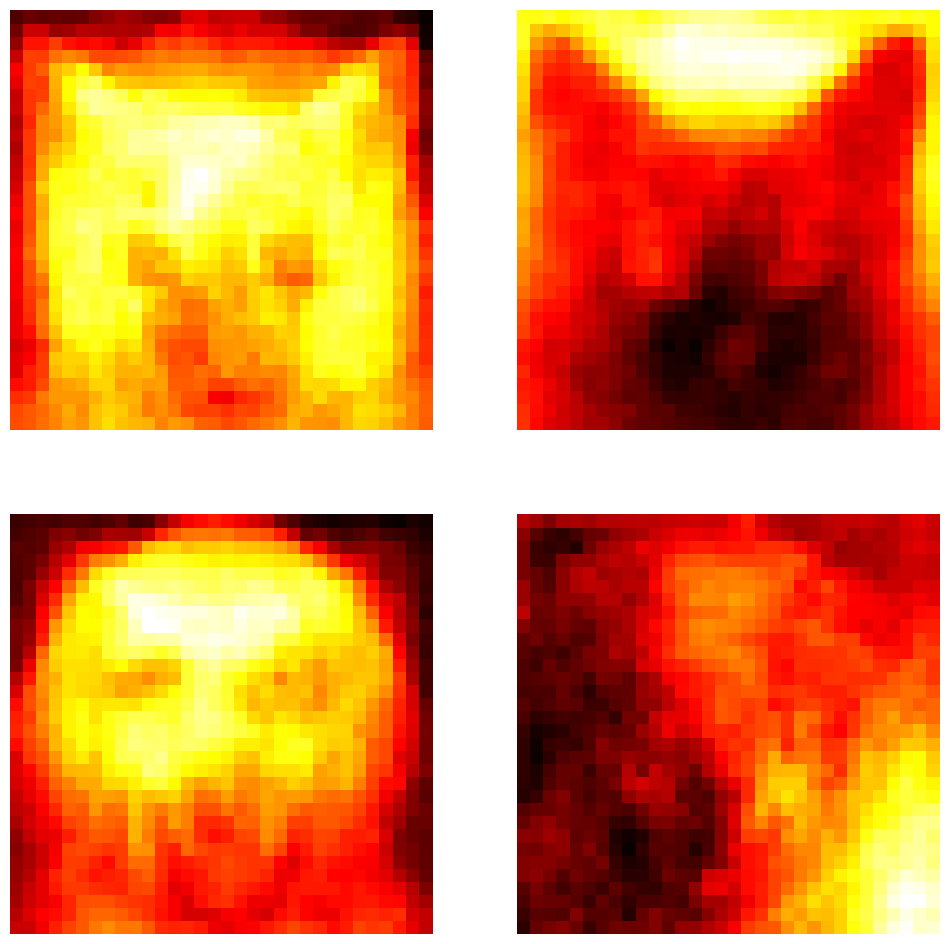

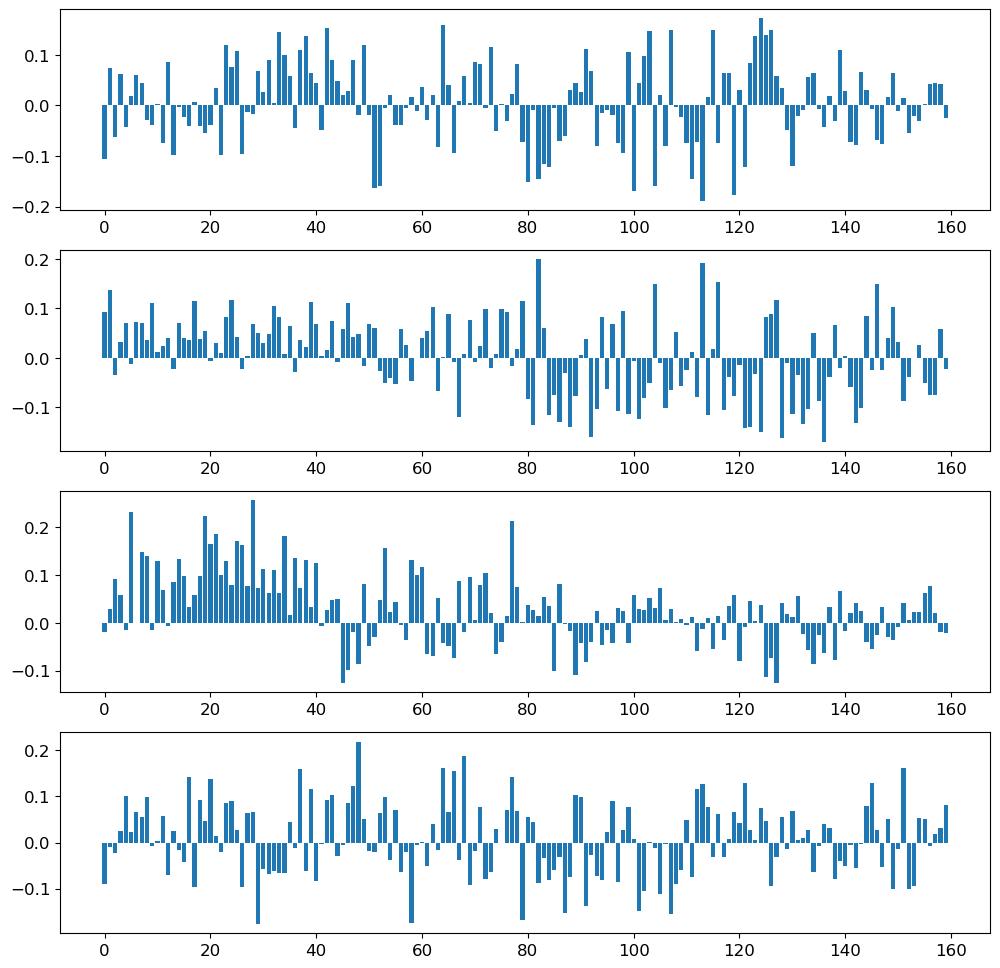

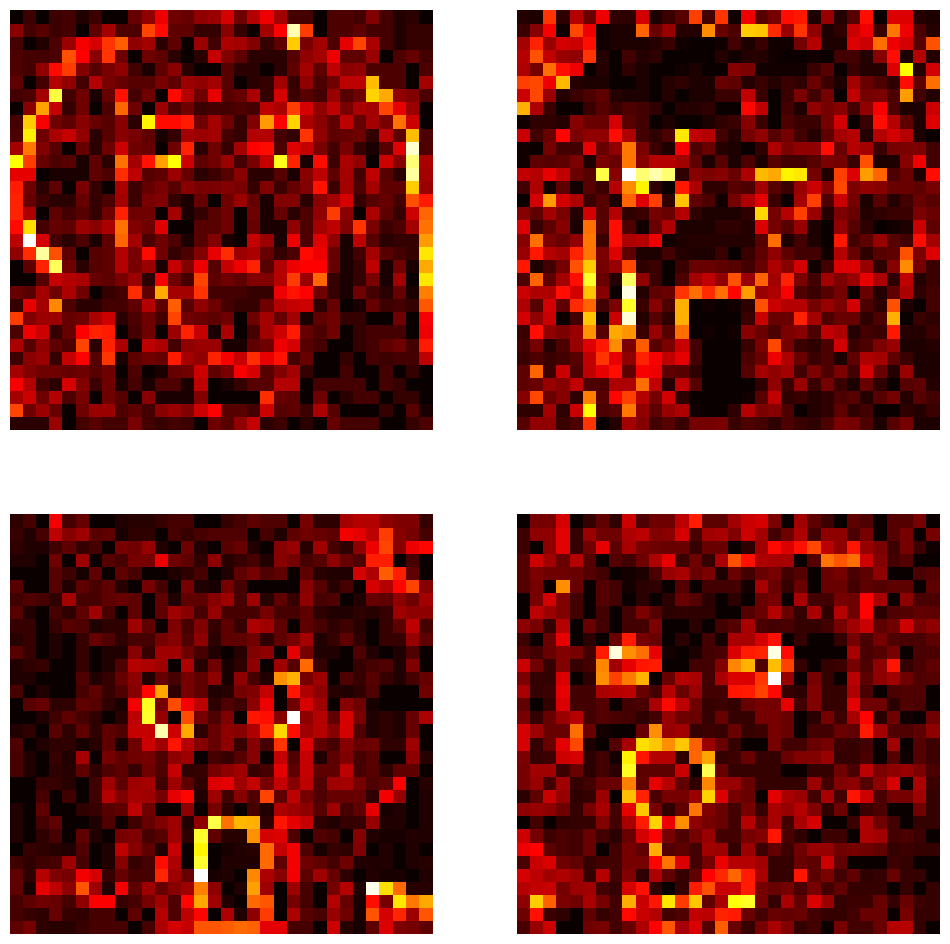

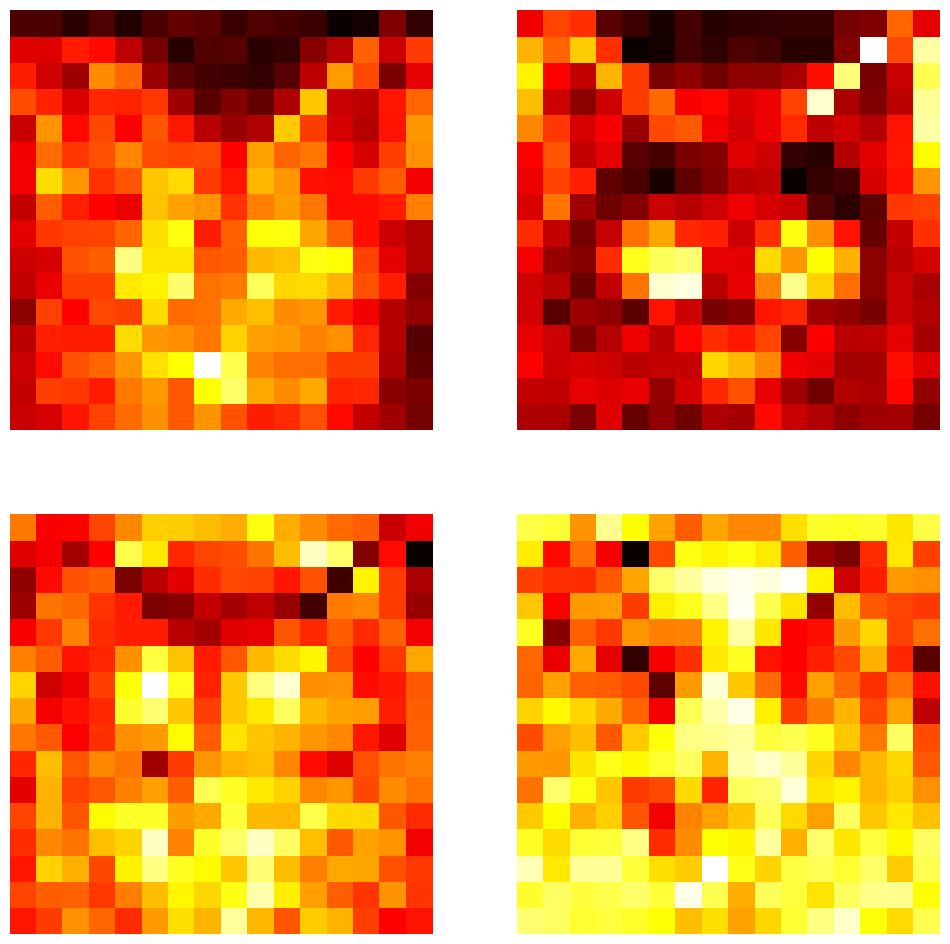

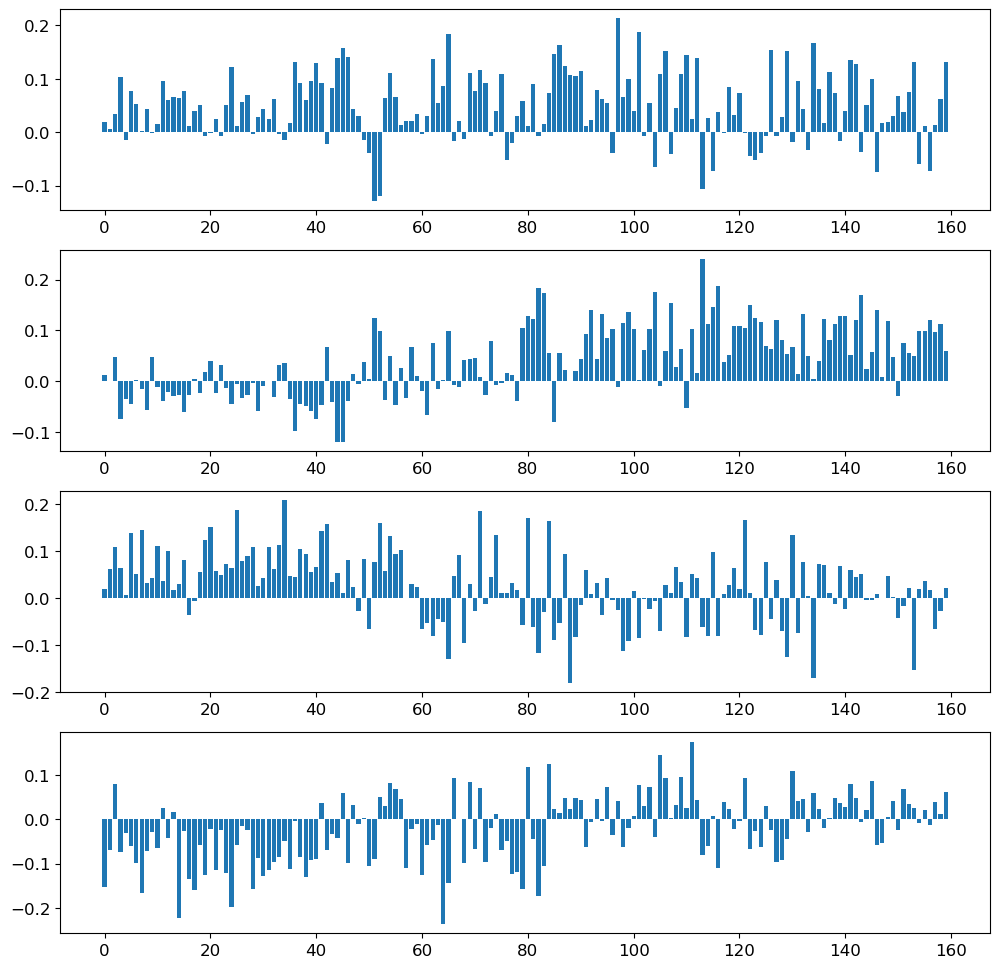

In [69]:
dogdata_mat = io.loadmat("DATA/dogData.mat")
catdata_mat = io.loadmat("DATA/catData.mat")

dogdata_w_mat = io.loadmat("DATA/dogData_w.mat")
catdata_w_mat = io.loadmat("DATA/catData_w.mat")

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog,cat), axis = 1)
CD2 = np.concatenate((dog_wave,cat_wave), axis = 1)

u, s, vT = np.linalg.svd(CD - np.mean(CD), full_matrices=0)
u2, s2, vT2 = np.linalg.svd(CD2 - np.mean(CD2), full_matrices=0)


fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)

for j in range(4):
    U = np.flipud(np.reshape(u[:,j],(64,64)))
    U2 = U[::2,::2]
    axs[j].pcolor(np.rot90(U2),cmap = 'hot')
    axs[j].axis('off')


fig, axs = plt.subplots(4,1)
axs = axs.reshape(-1)
for j in range(4):
    axs[j].bar(range(len(s)),vT[j,:])
    

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    Xd = np.flipud(np.reshape(dog_wave[:,j],(32,32)))
    axs[j].pcolor(np.rot90(Xd),cmap='hot')
    axs[j].axis('off')
    
fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)

for j in range(4):
    U = np.flipud(np.reshape(u2[:,j],(32,32)))
    U2 = U[::2,::2]
    axs[j].pcolor(np.rot90(U2),cmap = 'hot')
    axs[j].axis('off')


fig, axs = plt.subplots(4,1)
axs = axs.reshape(-1)
for j in range(4):
    axs[j].bar(range(len(s)),vT2[j,:])

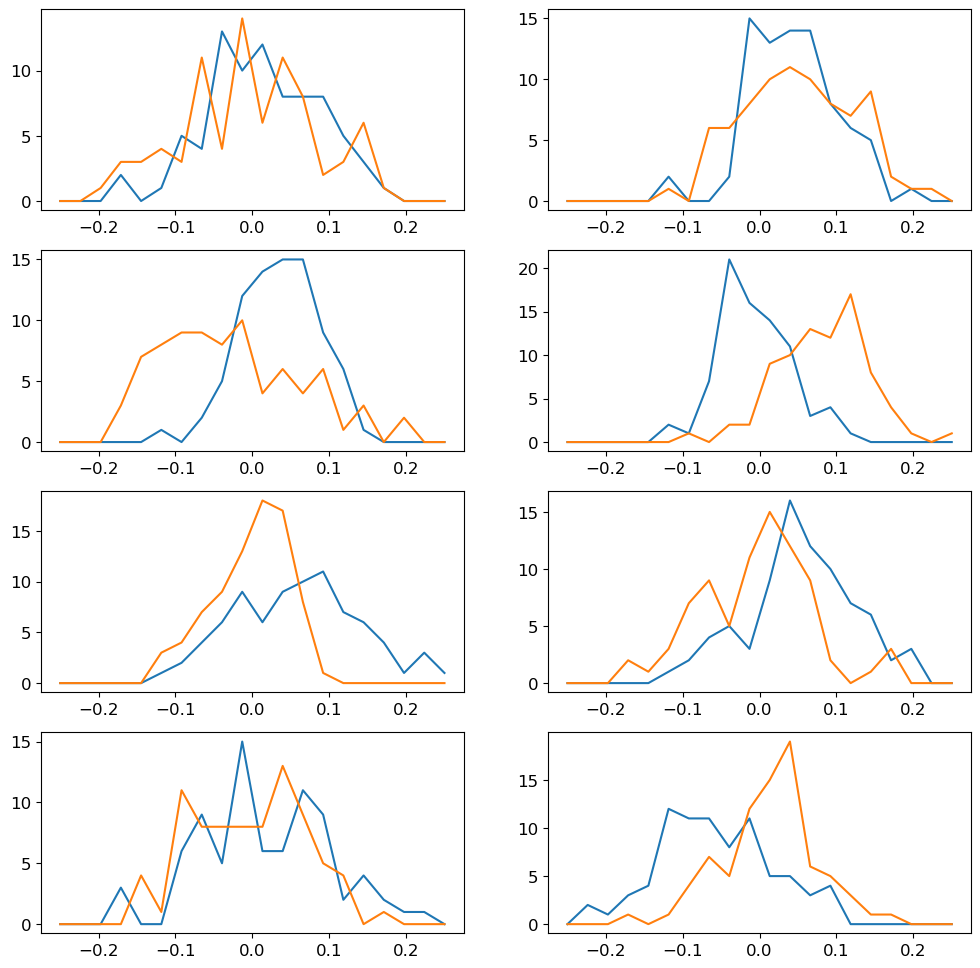

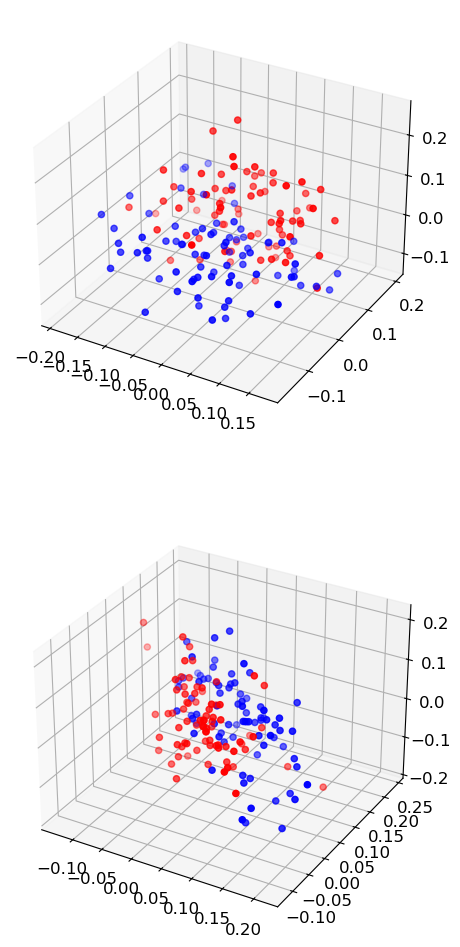

In [76]:
# plotting the distribution of the weights for the first four eigen faces
xbin = np.linspace(-0.25, 0.25, 20)
xbin_edges = np.append(xbin, xbin[-1]+(xbin[1]-xbin[0])) - (xbin[1]-xbin[0])/2

fig, axs = plt.subplots(4,2)
for j in range(4):
    pdf1 = np.histogram(vT[j,:80],bins = xbin_edges)[0]
    pdf2 = np.histogram(vT[j,80:],bins = xbin_edges)[0]
    axs[j,0].plot(xbin,pdf1)
    axs[j,0].plot(xbin,pdf2)
    
    pdf1 = np.histogram(vT2[j,:80],bins = xbin_edges)[0]
    pdf2 = np.histogram(vT2[j,80:],bins = xbin_edges)[0]
    axs[j,1].plot(xbin,pdf1)
    axs[j,1].plot(xbin,pdf2)
    
    
    
fig = plt.figure()
ax1 = fig.add_subplot(211, projection = '3d')
ax1.scatter(vT[0,:80], vT[1,:80], vT[2,:80], c = 'r', marker = 'o', s = 20)
ax1.scatter(vT[0,80:], vT[1,80:], vT[2,80:], c = 'b', marker = 'o', s = 20)

ax2 = fig.add_subplot(212, projection = '3d')
ax2.scatter(vT2[0,:80], vT2[1,:80], vT2[2,:80], c = 'r', marker = 'o', s = 20)
ax2.scatter(vT2[0,80:], vT2[1,80:], vT2[2,80:], c = 'b', marker = 'o', s = 20)

plt.show()



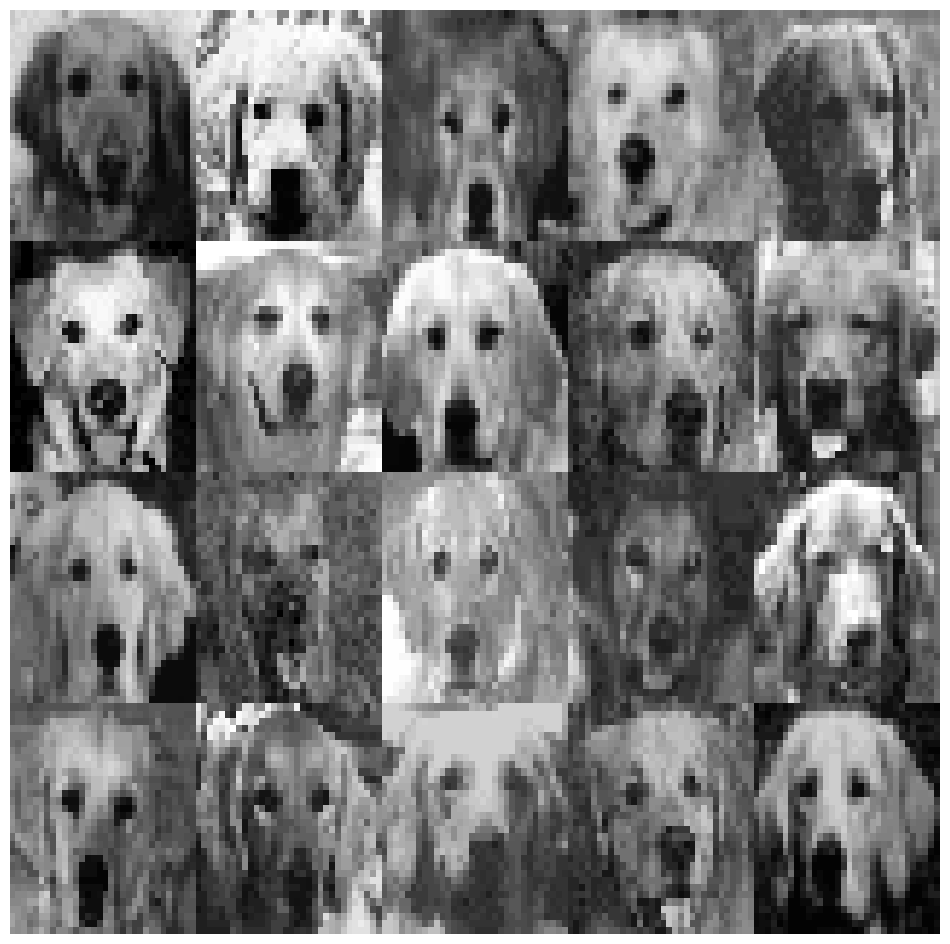

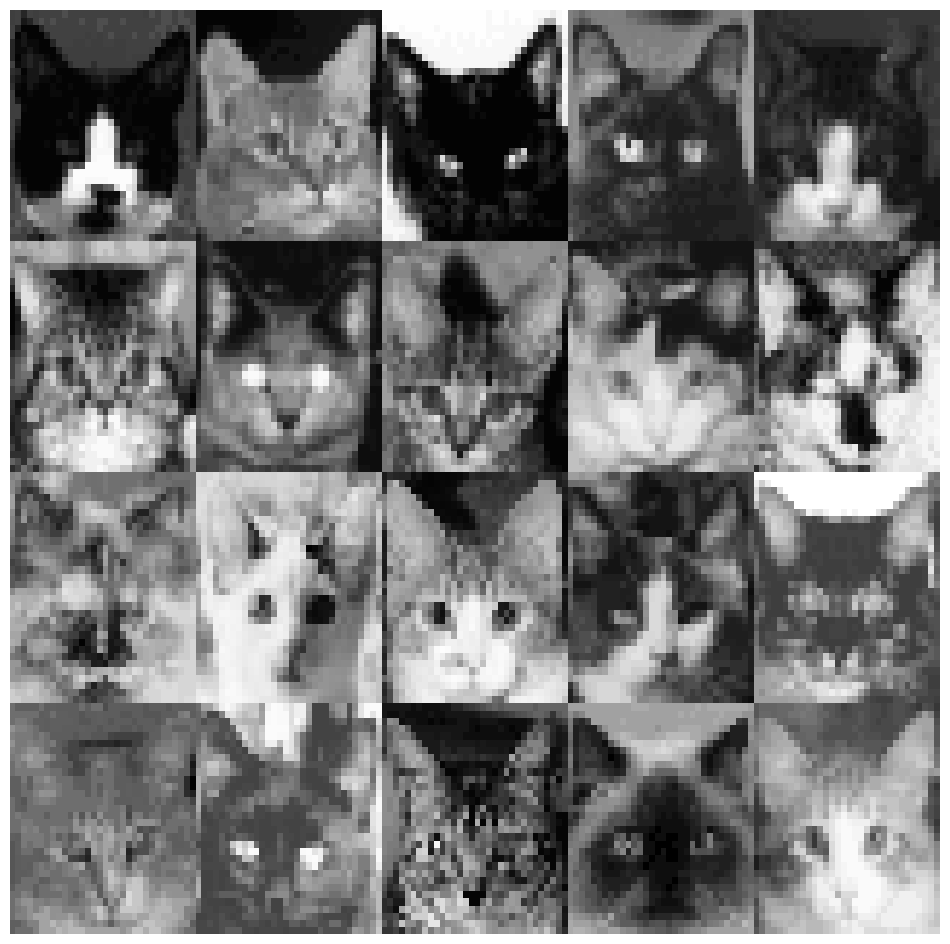

In [78]:
master = np.zeros((32*5, 32*4))
count = 0
for jj in range(4):
    for j in range(5):
        T2 = np.flipud(np.reshape(dog[:,count],(64,64)))
        T = T2[::2,::2]
        master[32*j:32*(j+1), 32*jj:32*(jj+1)] = T
        count +=1
        
plt.figure()
plt.pcolor(np.rot90(master),cmap = 'gray')
plt.axis('off')
plt.show()

master = np.zeros((32*5, 32*4))
count = 0
for jj in range(4):
    for j in range(5):
        T2 = np.flipud(np.reshape(cat[:,count],(64,64)))
        T = T2[::2,::2]
        master[32*j:32*(j+1), 32*jj:32*(jj+1)] = T
        count +=1
        
plt.figure()
plt.pcolor(np.rot90(master),cmap = 'gray')
plt.axis('off')
plt.show()

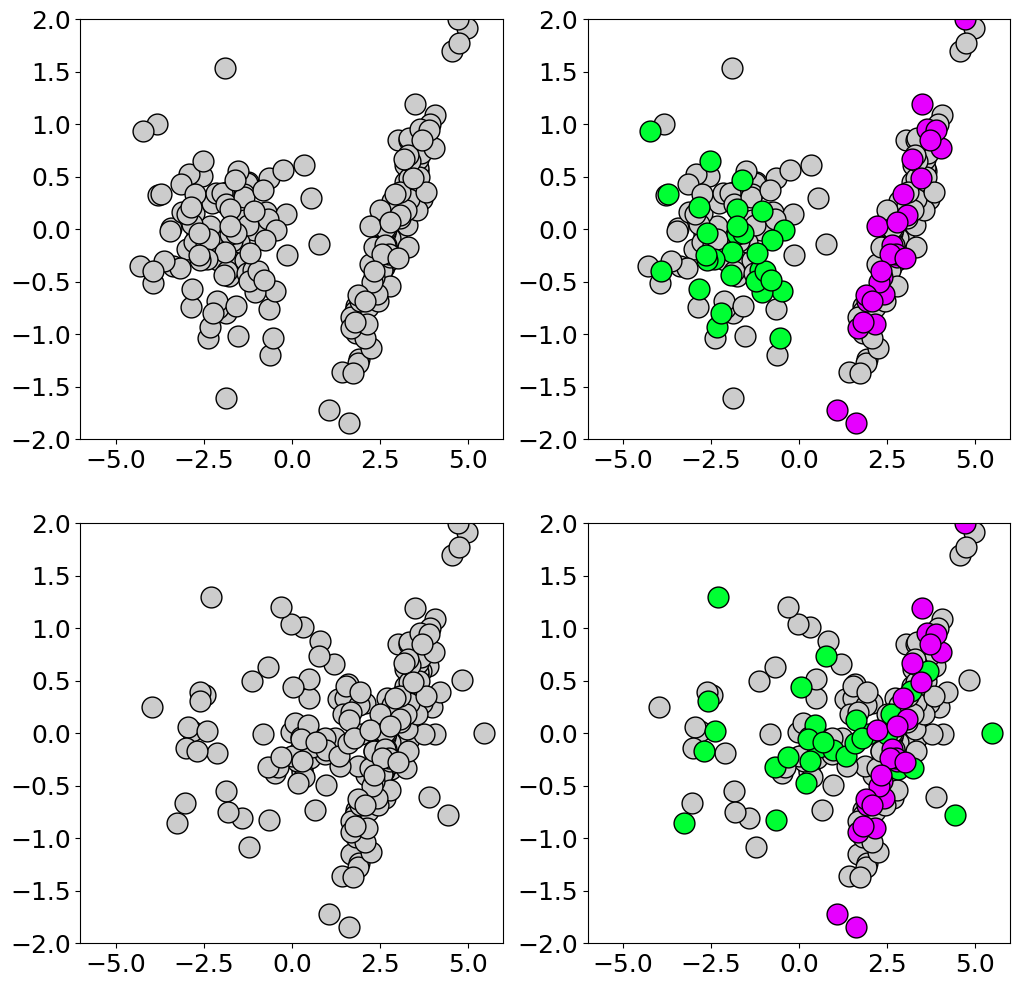

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size':18})

n1 = 100
n2 = 50

# random ellipse 1 centered at (-2,0)
x = np.random.randn(n1+n2) - 2
y = 0.5*np.random.randn(n1+n2)

# random ellipse 5 centered at (1,0)
x5 = 2*np.random.randn(n1+n2) + 1
y5 = 0.5*np.random.randn(n1+n2)

# random ellipse 2 centered at (2,-2)
x2 = np.random.randn(n1+n2) + 2
y2 = 0.2*np.random.randn(n1+n2) - 2

# rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2


fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].plot(x[:n1],y[:n1],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[0].plot(x3[:n1],y3[:n1],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)


axs[1].plot(x[:70],y[:70],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[1].plot(x3[:70],y3[:70],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[1].plot(x[70:100],y[70:100],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=15)
axs[1].plot(x3[70:100],y3[70:100],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=15)

axs[2].plot(x5[:n1],y5[:n1],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[2].plot(x3[:n1],y3[:n1],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)

axs[3].plot(x5[:70],y5[:70],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[3].plot(x3[:70],y3[:70],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[3].plot(x5[70:100],y5[70:100],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=15)
axs[3].plot(x3[70:100],y3[70:100],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=15)

for ax in axs:
    ax.set_xlim(-6,6)
    ax.set_ylim(-2,2)

plt.show()

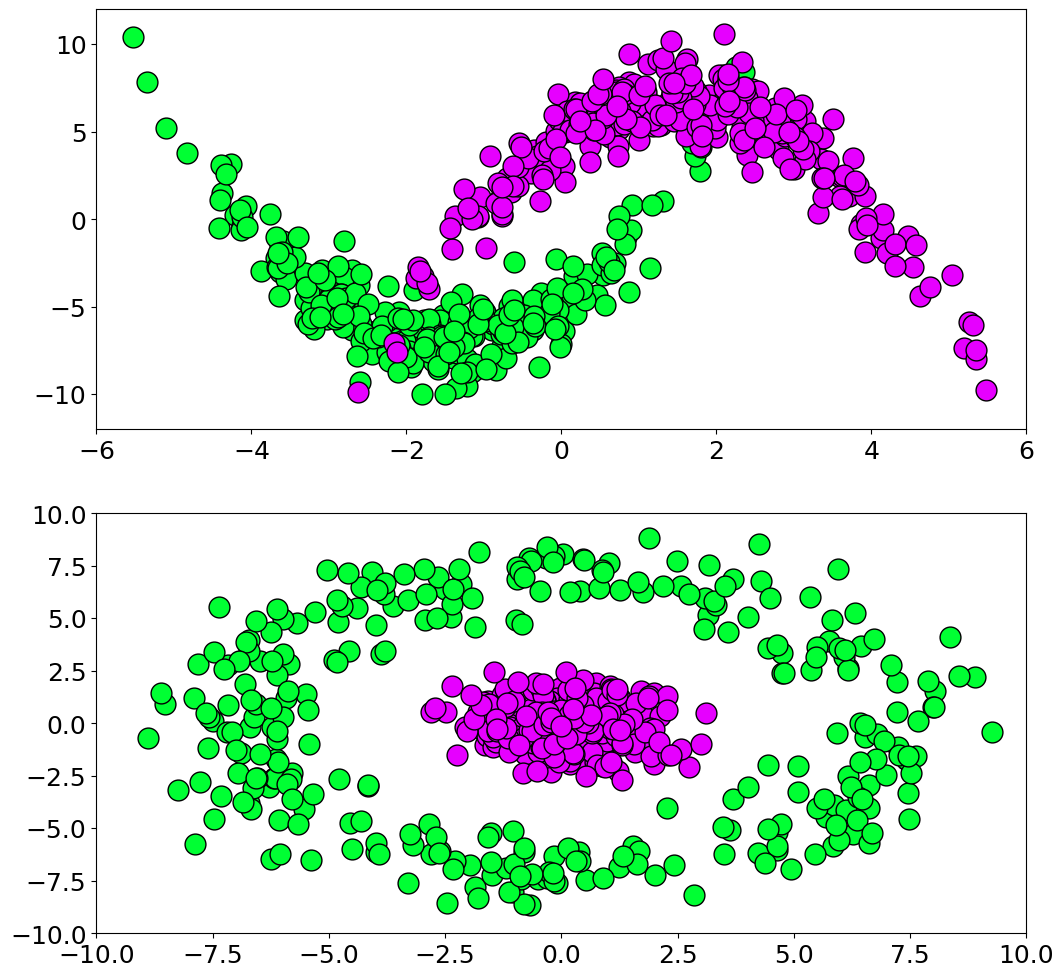

In [4]:
n1 = 300 # training set size
x1 = 1.5*np.random.randn(n1)-1.5
y1 = 1.2*np.random.randn(n1)+np.power(x1+1.5,2)-7
x2 = 1.5*np.random.randn(n1)+1.5
y2 = 1.2*np.random.randn(n1)-np.power(x2-1.5,2)+7

fig,axs = plt.subplots(2)
axs[0].plot(x1,y1,'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=15)
axs[0].plot(x2,y2,'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=15)
axs[0].set_xlim(-6,6)
axs[0].set_ylim(-12,12)

r = 7 + np.random.randn(n1)
th = 2*np.pi*np.random.randn(n1)
xr = r * np.cos(th)
yr = r * np.sin(th)

x5 = np.random.randn(n1)
y5 = np.random.randn(n1)

axs[1].plot(xr,yr,'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=15)
axs[1].plot(x5,y5,'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=15)
axs[1].set_xlim(-10,10)
axs[1].set_ylim(-10,10)

plt.show()

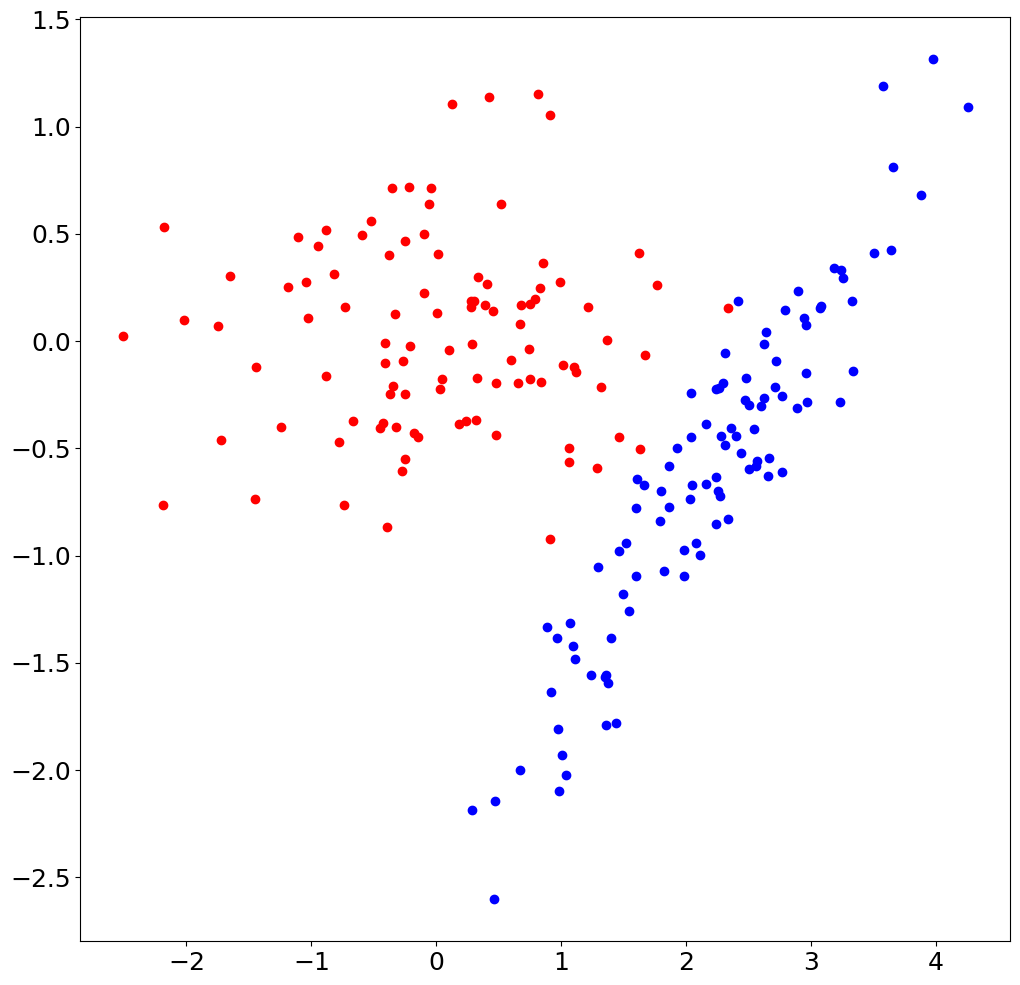

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

plt.rcParams.update({'font.size':18})
plt.rcParams['figure.figsize'] = [12, 12]

n1 = 100
n2 = 50

x = np.random.randn(n1+n2)
y = 0.5*np.random.randn(n1+n2)

x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) -2
theta = np.pi/4
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# x4,y4 = A@np.array([x2, y2])

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

plt.figure()
plt.plot(x[:n1],y[:n1],'ro')
plt.plot(x3[:n1],y3[:n1],'bo')
plt.show()

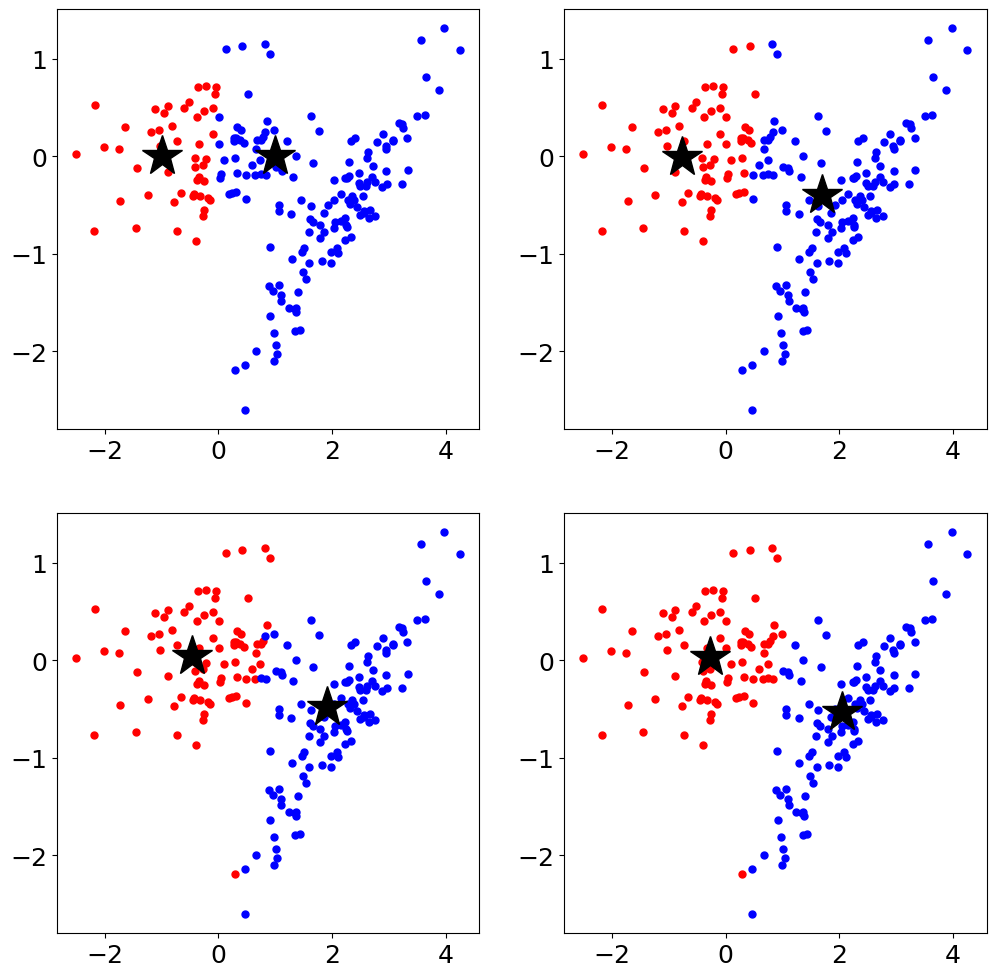

In [13]:
# Training set: first 200 of 240 points
X1 = np.column_stack((x3[:n1],y3[:n1]))
X2 = np.column_stack((x[:n1],y[:n1]))

Y = np.concatenate((X1,X2))
Z = np.column_stack((np.ones(n1),2*np.ones(n1)))

# Test set: remaining 40 points
x1test = np.column_stack((x3[n1:],y3[n1:]))
x2test = np.column_stack((x[n1:],y[n1:]))


g1 = np.array([-1,0])
g2 = np.array([1,0])
fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    class1 = np.zeros((1,2))
    class2 = np.zeros((1,2))
    
    for jj in range(Y.shape[0]):
        d1 = np.linalg.norm(g1-Y[jj,:], ord = 2)
        d2 = np.linalg.norm(g2-Y[jj,:], ord = 2)
        if d1<d2:
            class1 = np.append(class1, Y[jj,:].reshape((1,2)), axis = 0)
        else:
            class2 = np.append(class2, Y[jj,:].reshape((1,2)), axis = 0)
    class1 = np.delete(class1, (0), axis = 0)# removing zeros that were used to initialize the variable
    class2 = np.delete(class2, (0), axis = 0)# removing zeros that were used to initialize the variable


    axs[j].plot(class1[:,0], class1[:,1], 'ro', ms = 5)
    axs[j].plot(class2[:,0], class2[:,1], 'bo', ms = 5)
    axs[j].plot(g1[0], g1[1], 'k*', ms = 30)
    axs[j].plot(g2[0], g2[1], 'k*', ms = 30)

    g1 = np.array([np.mean(class1[:,0]), np.mean(class1[:,1])])
    g2 = np.array([np.mean(class2[:,0]), np.mean(class2[:,1])])
                
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


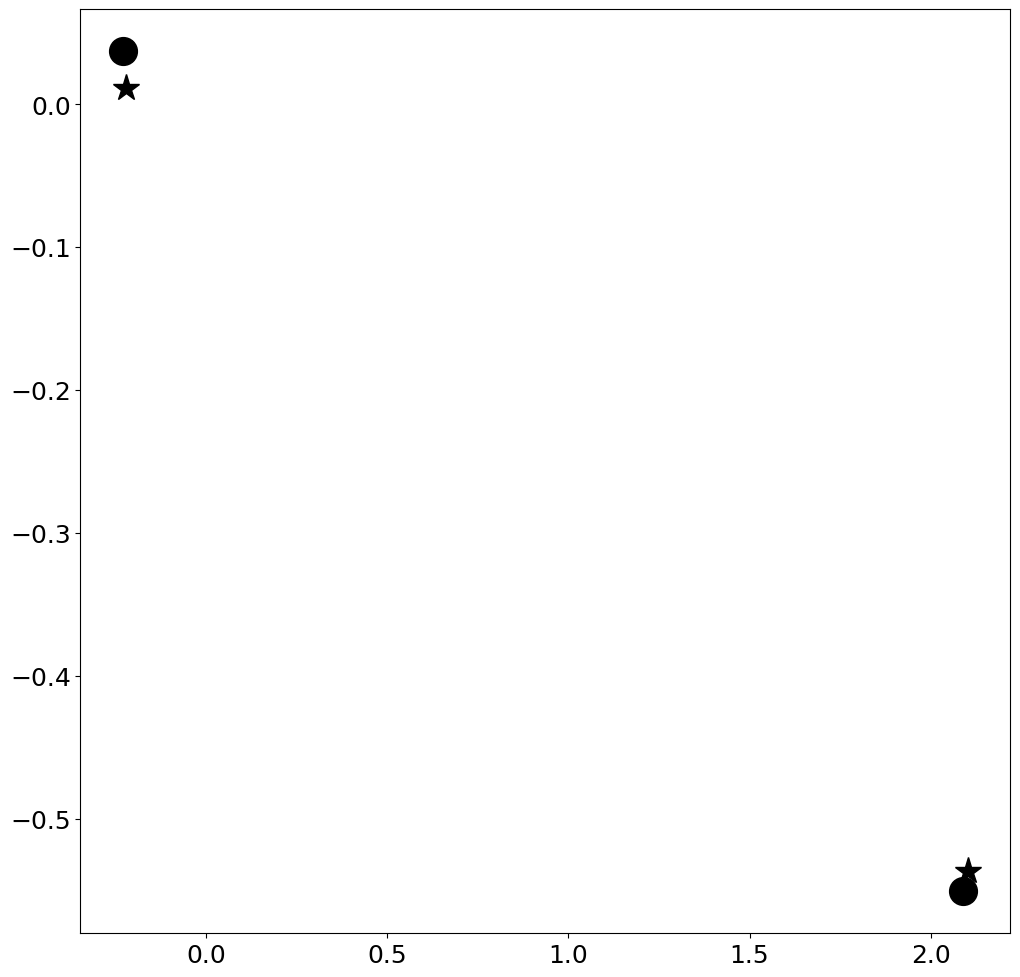

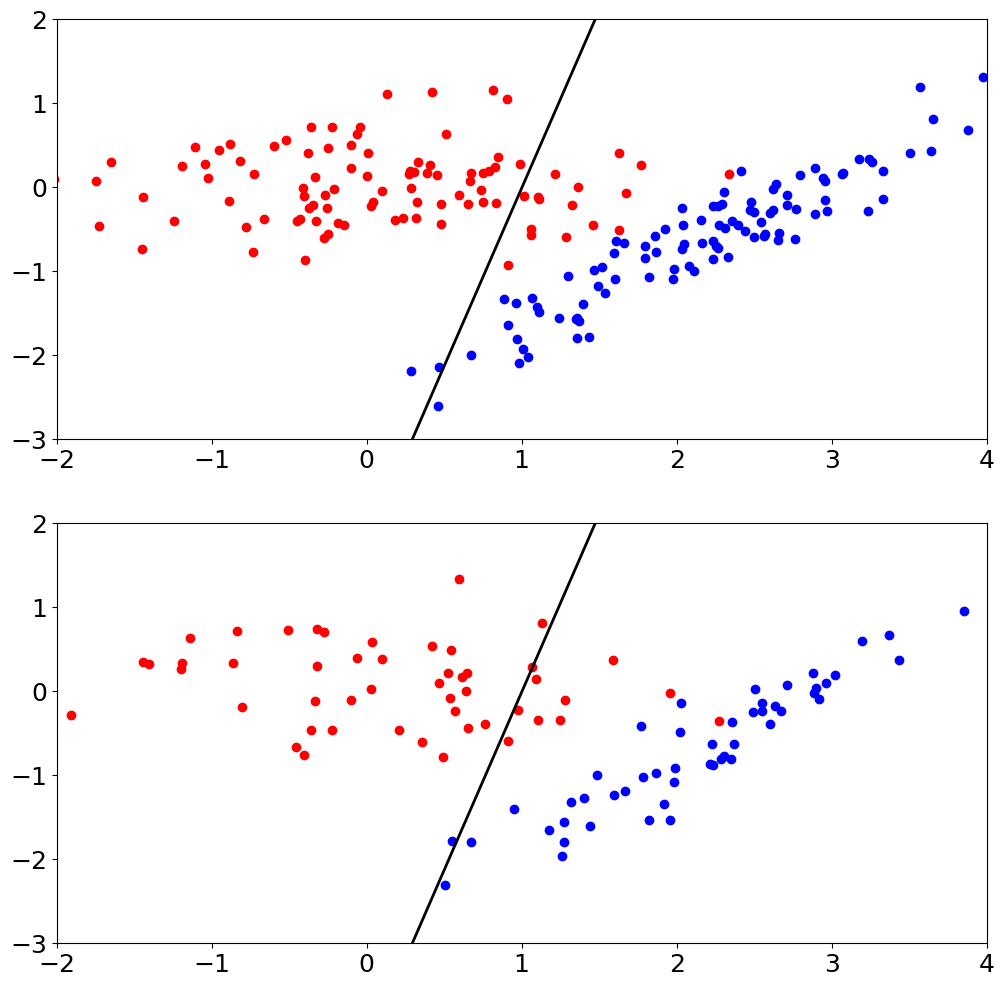

In [14]:
# kmeans code
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(Y)
c = kmeans.cluster_centers_
ind = kmeans.labels_

# result from previous section
plt.plot(g1[0],g1[1],'ko',ms=20)
plt.plot(g2[0],g2[1],'ko',ms=20)

# kmeans result
plt.plot(c[0,0],c[0,1],'k*',ms=20)
plt.plot(c[1,0],c[1,1],'k*',ms=20)

plt.show()


midx = (c[0,0]+c[1,0])/2
midy = (c[0,1]+c[1,1])/2
slope = (c[1,1]-c[0,1])/(c[1,0]-c[0,0])
b = midy + (1/slope)*midx
xsep = np.arange(-1,2,0.1)
ysep = -(1/slope)*xsep + b

fig,axs = plt.subplots(2)
axs[0].plot(x[:n1],y[:n1],'ro')
axs[0].plot(x3[:n1],y3[:n1],'bo')
axs[0].plot(xsep,ysep,c='k',linewidth=2)
axs[0].set_xlim(-2,4)
axs[0].set_ylim(-3,2)

# error on test data

axs[1].plot(x[n1:],y[n1:],'ro')
axs[1].plot(x3[n1:],y3[n1:],'bo')
axs[1].plot(xsep,ysep,c='k',linewidth=2)
axs[1].set_xlim(-2,4)
axs[1].set_ylim(-3,2)

plt.show()

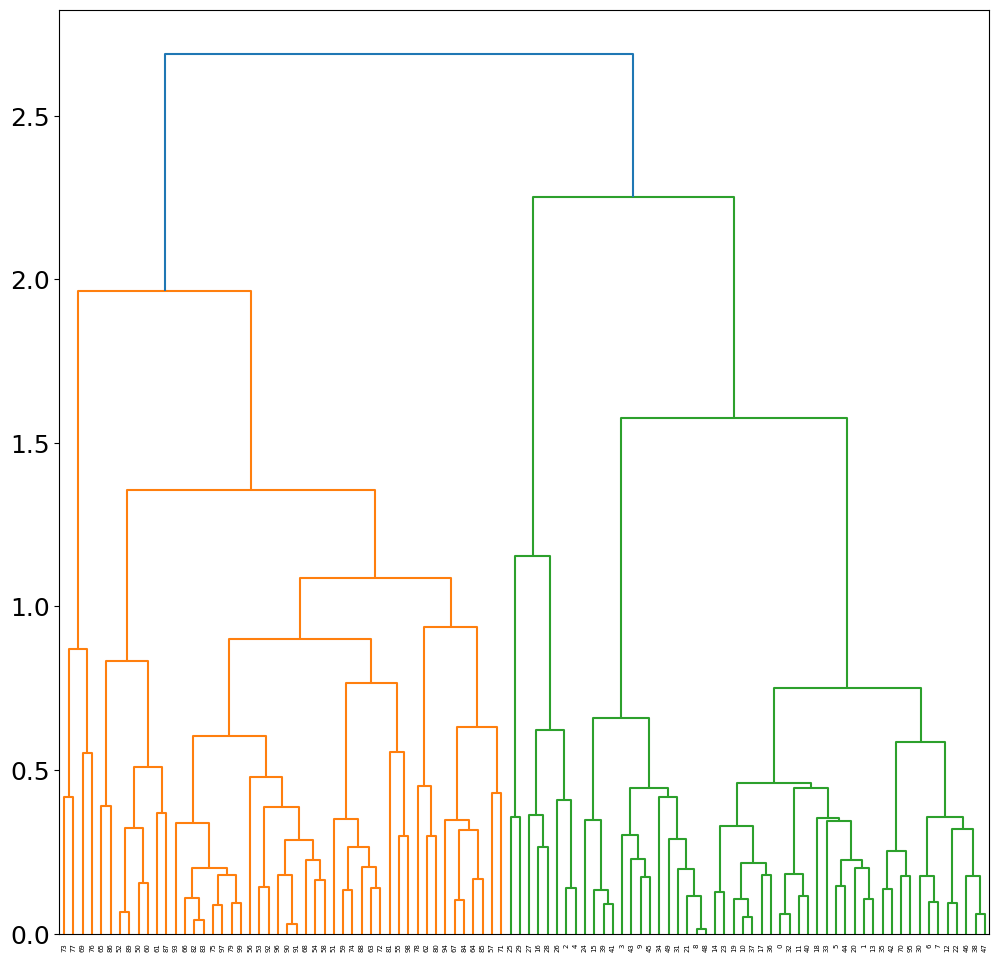

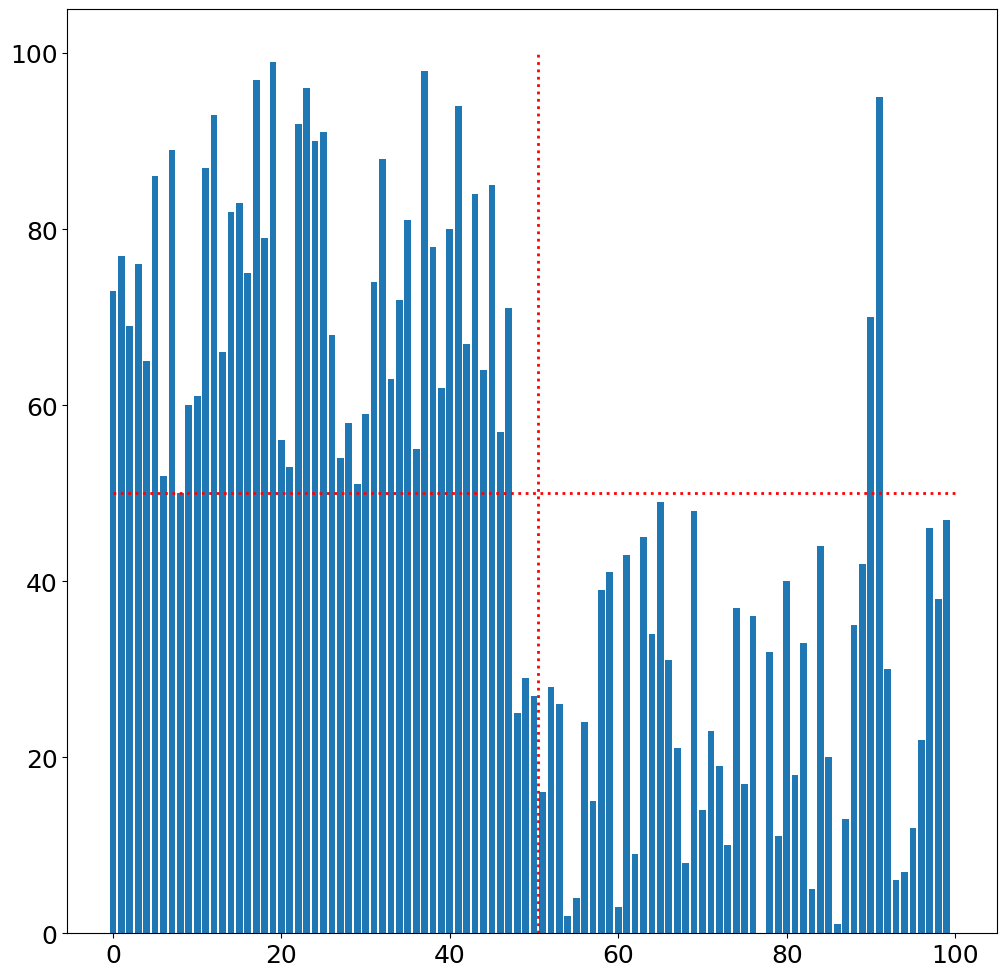

In [15]:
# Dendograms

Y3 = np.concatenate((X1[:50,:], X2[:50,:]))

Y2 = pdist(Y3, metric = 'euclidean')
Z = hierarchy.linkage(Y2, method = 'average')
thresh = 0.85*np.max(Z[:,2])

plt.figure()
dn = hierarchy.dendrogram(Z,p = 100, color_threshold = thresh)

plt.show()

plt.figure()
plt.bar(range(100), dn['leaves'])
plt.plot(np.array([0,100]), np.array([50,50]), 'r:', linewidth = 2)
plt.plot(np.array([50.5,50.5]), np.array([0,100]), 'r:', linewidth = 2)
plt.show()

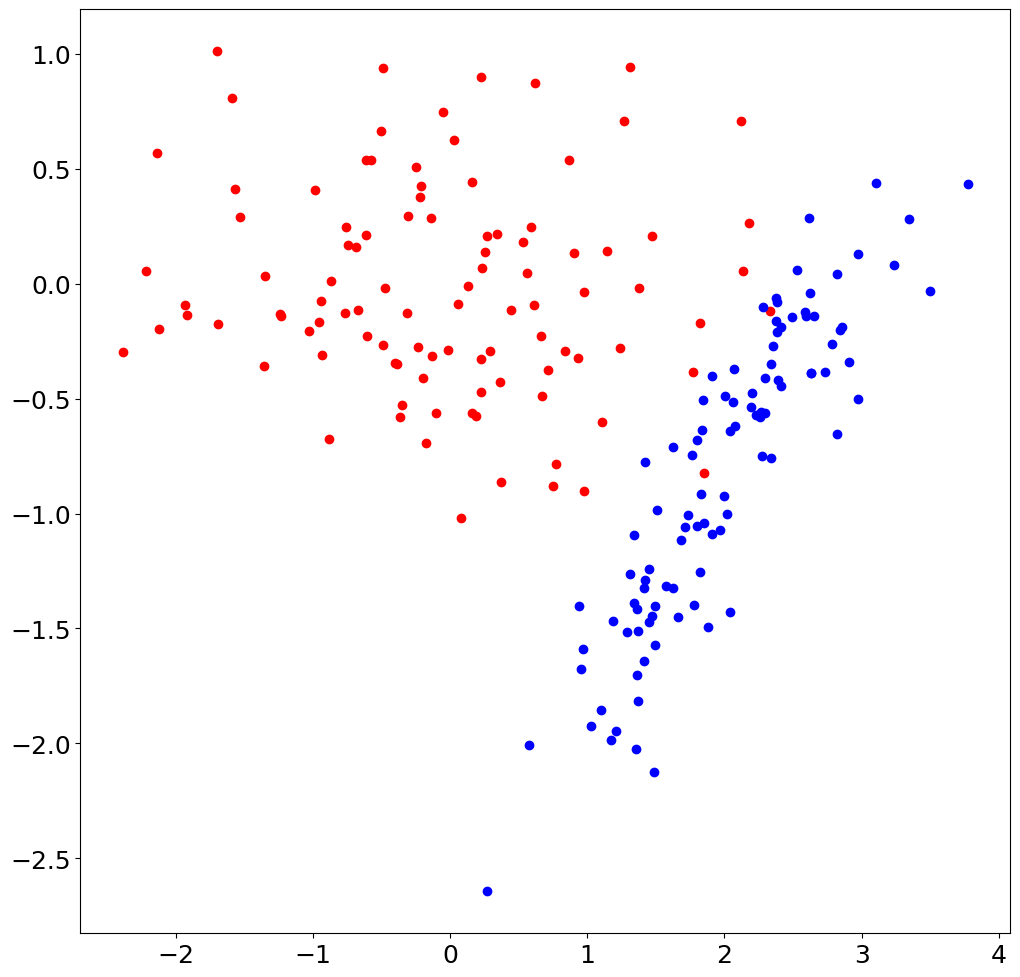

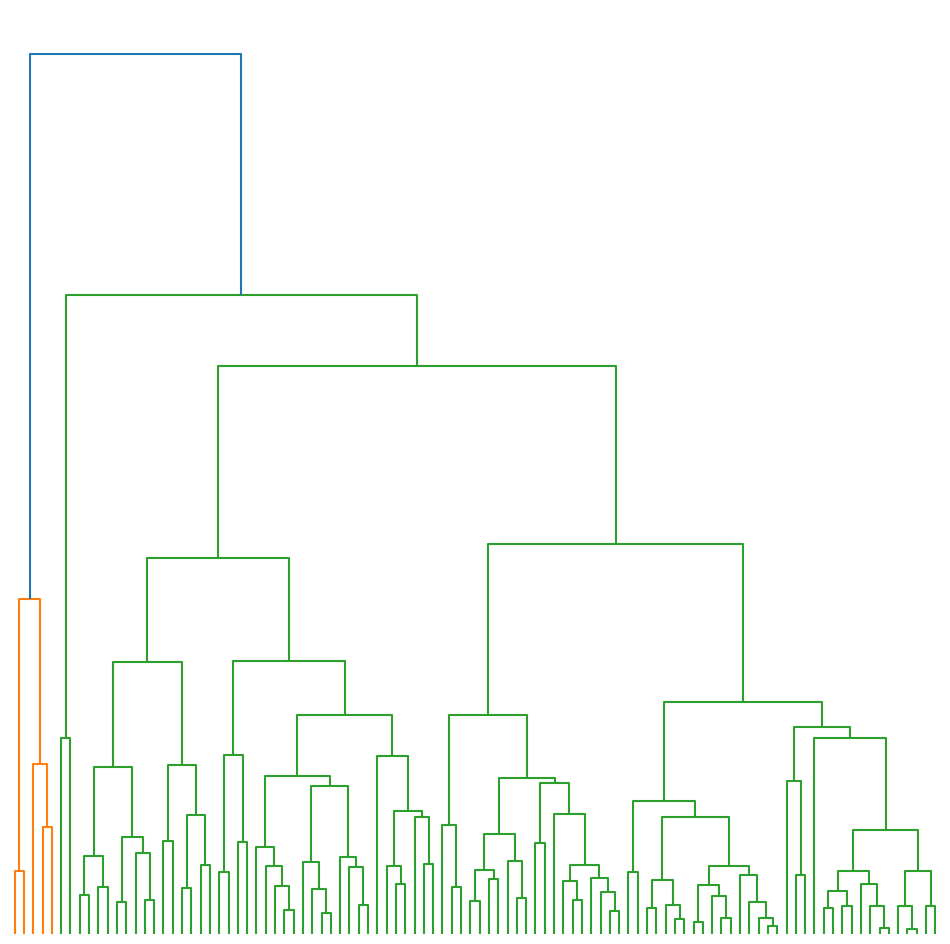

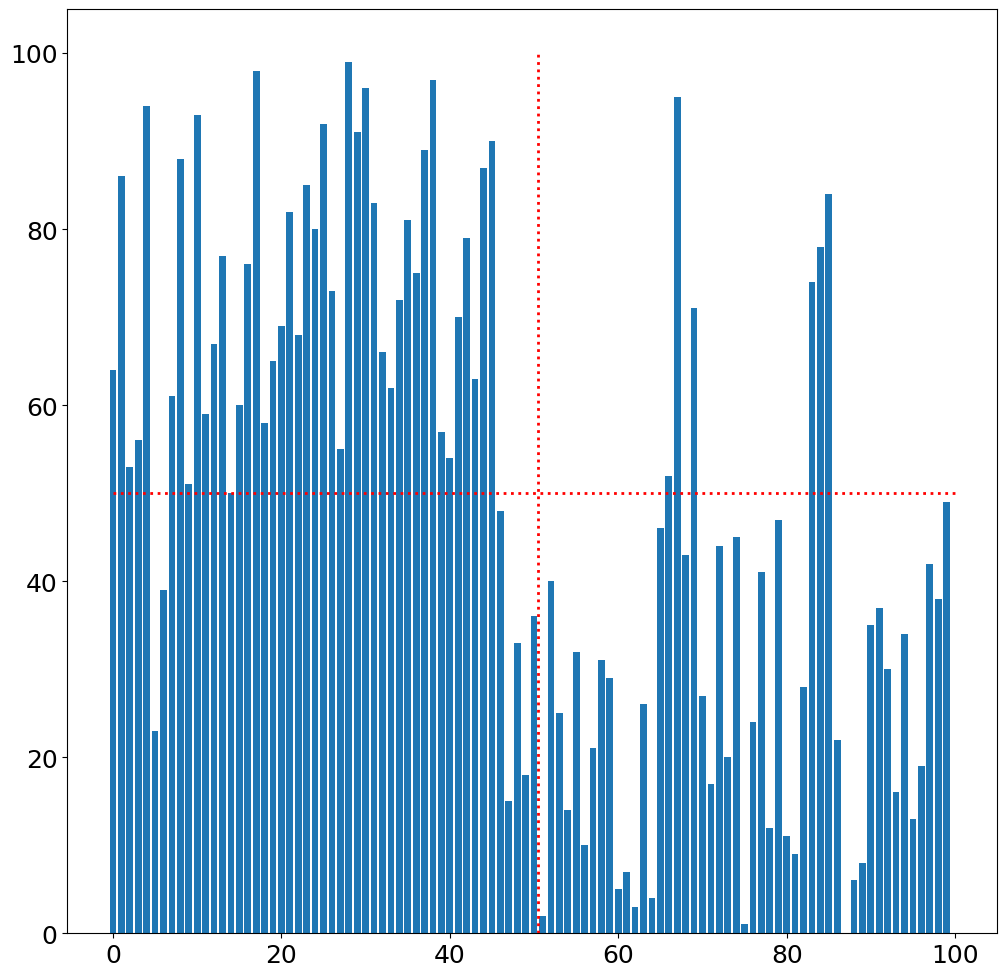

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

plt.rcParams.update({'font.size':18})
plt.rcParams['figure.figsize'] = [12, 12]

# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (0,0)
x = np.random.randn(n1+n2)
y = 0.5*np.random.randn(n1+n2)

# Random ellipse 2 centered at (1,-2)
x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

plt.figure()
plt.plot(x[:n1],y[:n1],'ro')
plt.plot(x3[:n1],y3[:n1],'bo')
plt.show()



# Training set: first 200 of 240 points
X1 = np.column_stack((x3[:n1],y3[:n1]))
X2 = np.column_stack((x[:n1],y[:n1]))

Y = np.concatenate((X1,X2))
Z = np.column_stack((np.ones(n1),2*np.ones(n1)))

# Test set: remaining 40 points
x1test = np.column_stack((x3[n1:],y3[n1:]))
x2test = np.column_stack((x[n1:],y[n1:]))



## Dendrograms

Y3 = np.concatenate((X1[:50,:],X2[:50,:]))

Y2 = pdist(Y3,metric='euclidean')
Z = hierarchy.linkage(Y2,method='average')
thresh = 0.85*np.max(Z[:,2])

plt.figure()
dn = hierarchy.dendrogram(Z,p=100,color_threshold=thresh)
plt.axis('off')

plt.show()


plt.figure()
plt.bar(range(100),dn['leaves'])
plt.plot(np.array([0, 100]),np.array([50, 50]),'r:',linewidth=2)
plt.plot(np.array([50.5, 50.5]),np.array([0, 100]),'r:',linewidth=2)

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\simit\AppData\Local\Temp\ipykernel_12380\1067519603.py:38: UserWarning: The following kwargs were not used by contour: 'linestyle'
  CS = plt.contour(X, Y, Z, levels = np.arange(3,32,4), colors = 'k', linestyle = 'solid')


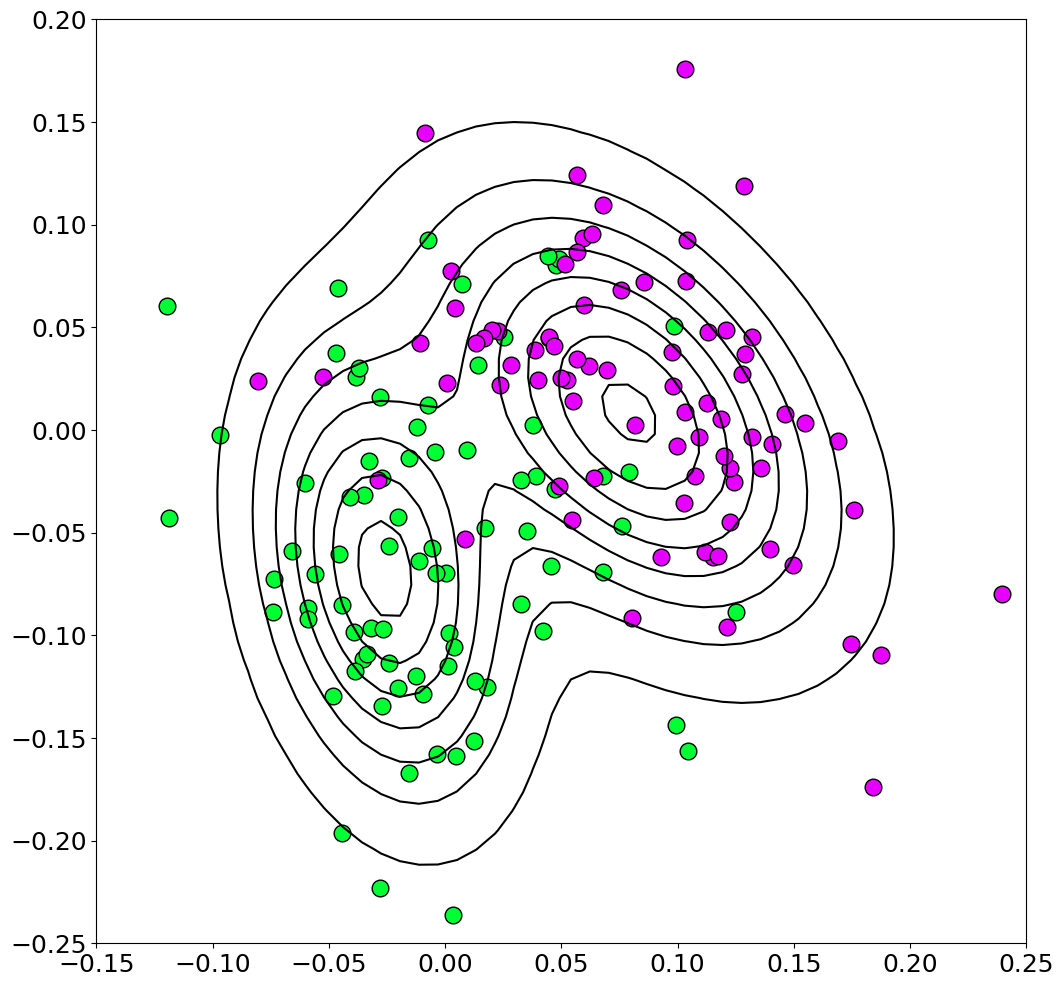

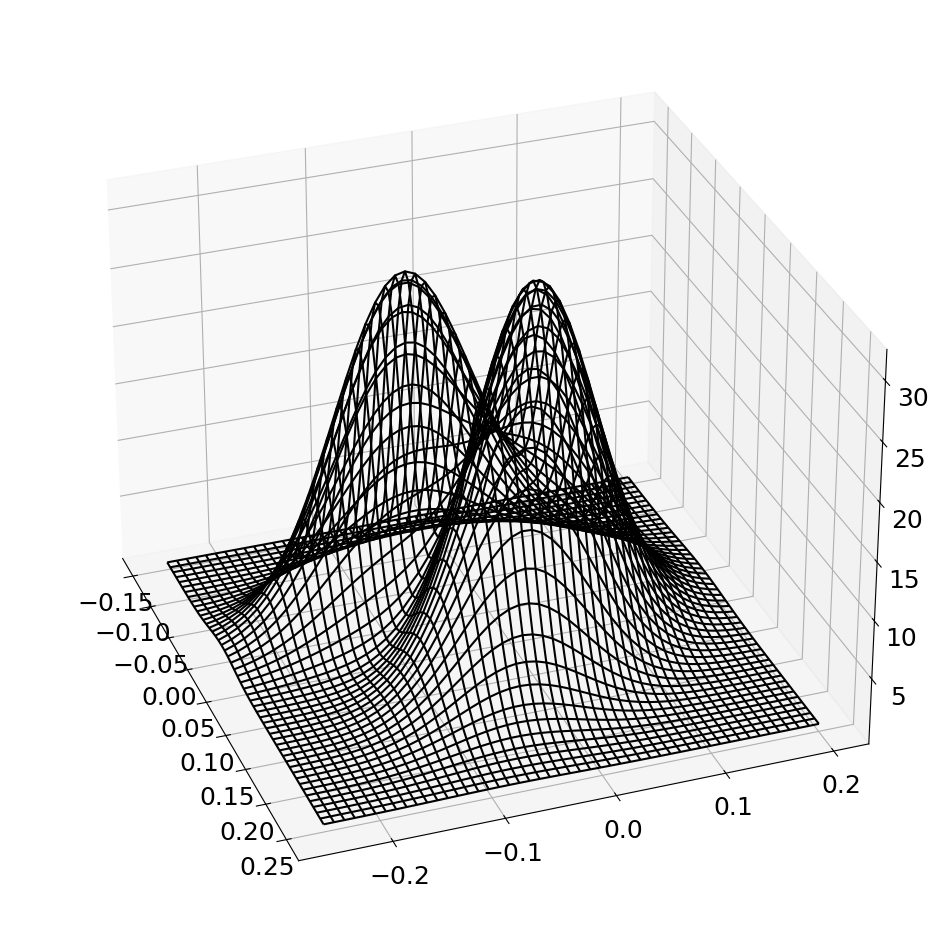

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn.mixture import GaussianMixture
from mpl_toolkits import mplot3d

plt.rcParams.update({'font.size':18})
plt.rcParams['figure.figsize'] = [12, 12]


dogdata_w_mat = io.loadmat("DATA/dogData_w.mat")
catdata_w_mat = io.loadmat("DATA/catData_w.mat")


dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

dogcat = v[:,(1,3)]
GMModel = GaussianMixture(n_components=2).fit(dogcat)
AIC = GMModel.aic(dogcat)


plt.plot(v[:80,1], v[:80,3], 'ro', markerfacecolor = (0,1,0.2), markeredgecolor = 'k', ms = 12)
plt.plot(v[80:,1], v[80:,3], 'ro', markerfacecolor = (0.9,0,1), markeredgecolor = 'k', ms = 12)

x = np.linspace(-0.15, 0.25)
y = np.linspace(-0.25, 0.2)
X, Y = np.meshgrid(x,y)
XX = np.array([X.ravel(),Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, levels = np.arange(3,32,4), colors = 'k', linestyle = 'solid')
plt.show()

ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.view_init(30, -20)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

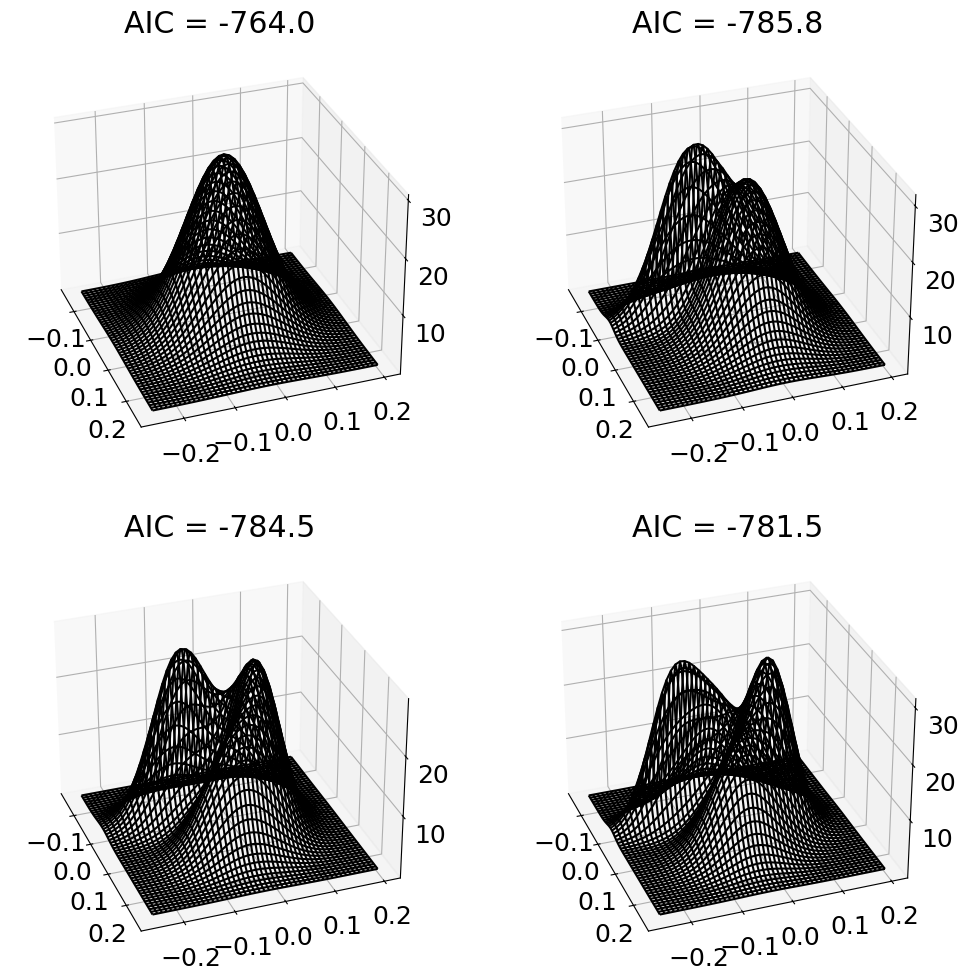

In [43]:
## AIC Scores
AIC = np.zeros(4)
GMModels = [GaussianMixture(k+1,covariance_type='diag',max_iter=500).fit(dogcat)
          for k in range(4)]

fig,axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)

for j in range(len(axs)):
    Z = np.exp(GMModels[j].score_samples(XX))
    Z = Z.reshape(X.shape)
    AIC[j] = GMModels[j].aic(dogcat)
    axs[j].plot_wireframe(X, Y, Z, color='black')
    axs[j].view_init(30, -20)
    axs[j].set_title('AIC = {:.4}'.format(AIC[j]))


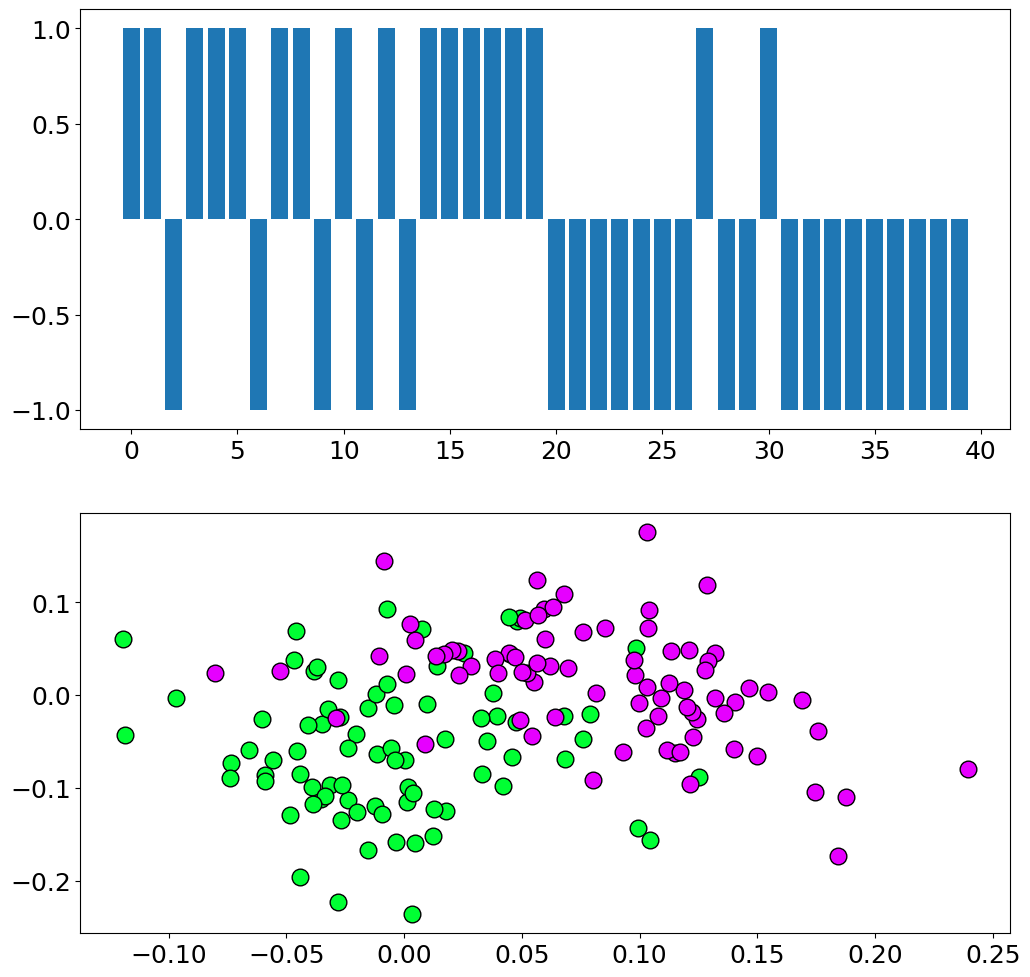

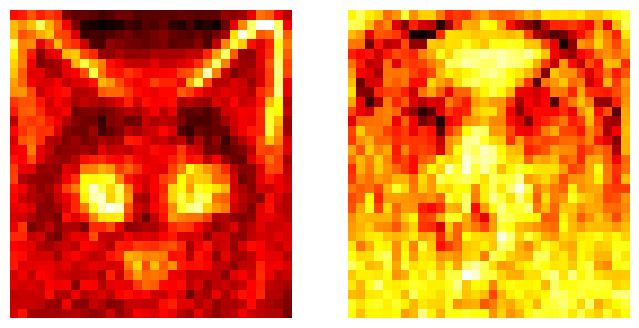

REPEATING THE SAME FOR NON-WAVELET TRANFORMED DATA


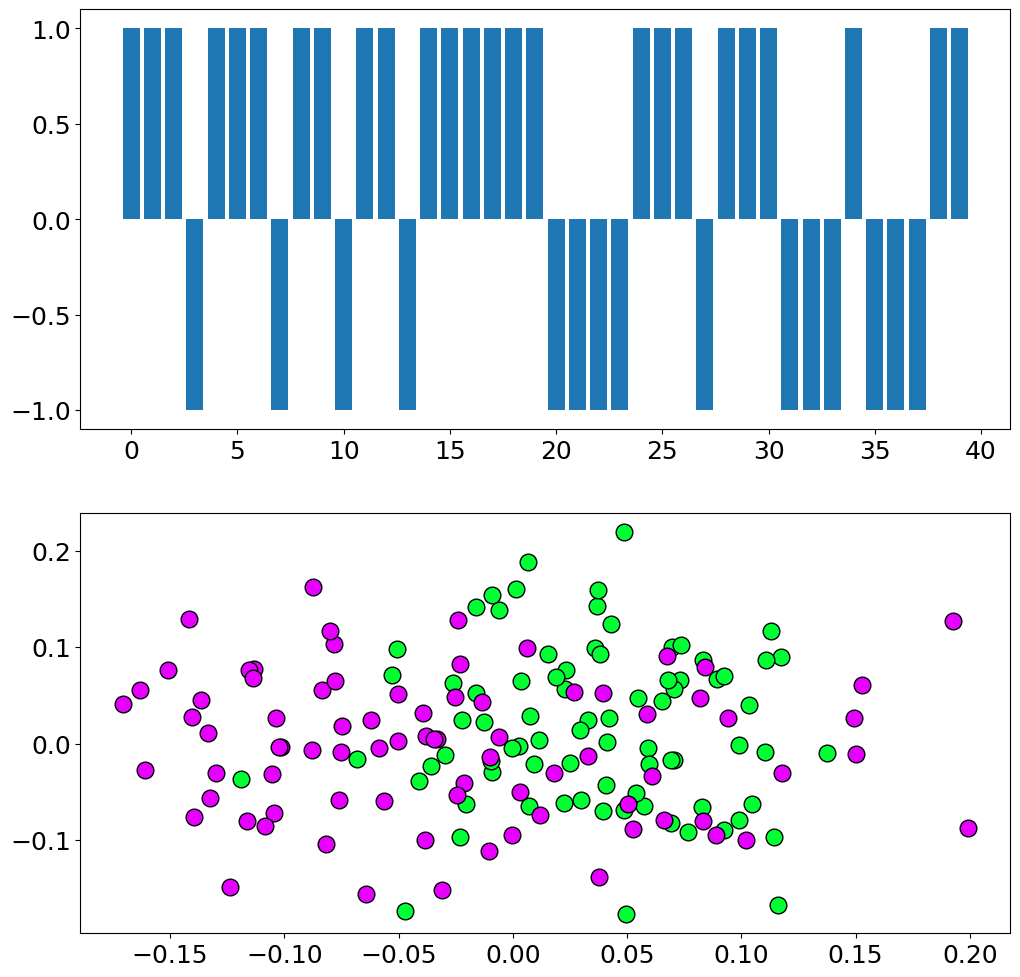

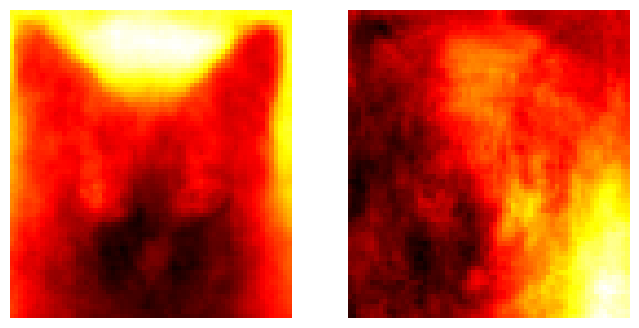

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size':18})

dog_w_mat = io.loadmat("DATA/dogData_w.mat")
cat_w_mat = io.loadmat("DATA/catData_w.mat")

dog_wave = dog_w_mat['dog_wave']
cat_wave = cat_w_mat['cat_wave']

CD = np.concatenate((dog_wave, cat_wave), axis = 1)

u, s, vT = np.linalg.svd(CD-np.mean(CD), full_matrices=0)
v = vT.T

xtrain = np.concatenate((v[:60, np.array([1,3])], v[80:140, np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)# repeats each element by the mentioned number
test = np.concatenate((v[60:80, np.array([1,3])], v[140:160, np.array([1,3])]))


Ida = LinearDiscriminantAnalysis()
test_class = Ida.fit(xtrain, label).predict(test)

truth = np.repeat(np.array([1,-1]), 20)
E = 100*(1-np.sum(0.5*np.abs(test_class - truth))/40)

fig, axs = plt.subplots(2)
axs[0].bar(range(40),test_class)

axs[1].plot(v[:80,1], v[:80,3], 'ro', markerfacecolor = (0, 1, 0.2), markeredgecolor = 'k', ms = 12)
axs[1].plot(v[80:,1], v[80:,3], 'bo', markerfacecolor = (0.9, 0, 1), markeredgecolor = 'k', ms = 12)

plt.show()

plt.rcParams['figure.figsize'] = [8, 4]
fig, axs = plt.subplots(1,2)
for j in range(2):
    U3 = np.flipud(np.reshape(u[:,2*j+1], (32,32)))
    axs[j].pcolor(np.rot90(U3), cmap = 'hot')
    axs[j].axis('off')
    
plt.show()


print("REPEATING THE SAME FOR NON-WAVELET TRANFORMED DATA")
dogdata_mat = io.loadmat("DATA/dogData.mat")
catdata_mat = io.loadmat("DATA/catData.mat")

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

CD = np.concatenate((dog,cat),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

xtrain1 = np.concatenate((v[:60, np.array([1,3])], v[80:140, np.array([1,3])]))
label1 = np.repeat(np.array([1,-1]),60)# repeats each element by the mentioned number
test1 = np.concatenate((v[60:80, np.array([1,3])], v[140:160, np.array([1,3])]))


Ida1 = LinearDiscriminantAnalysis()
test_class1 = Ida.fit(xtrain1, label1).predict(test1)

truth1 = np.repeat(np.array([1,-1]), 20)
E1 = 100*(1-np.sum(0.5*np.abs(test_class1 - truth1))/40)

plt.rcParams['figure.figsize'] = [12, 12]
fig, axs = plt.subplots(2)
axs[0].bar(range(40),test_class1)

axs[1].plot(v[:80,1], v[:80,3], 'ro', markerfacecolor = (0, 1, 0.2), markeredgecolor = 'k', ms = 12)
axs[1].plot(v[80:,1], v[80:,3], 'bo', markerfacecolor = (0.9, 0, 1), markeredgecolor = 'k', ms = 12)

plt.show()

plt.rcParams['figure.figsize'] = [8, 4]
fig, axs = plt.subplots(1,2)
for j in range(2):
    U3 = np.flipud(np.reshape(u[:,2*j+1], (64,64)))
    axs[j].pcolor(np.rot90(U3), cmap = 'hot')
    axs[j].axis('off')

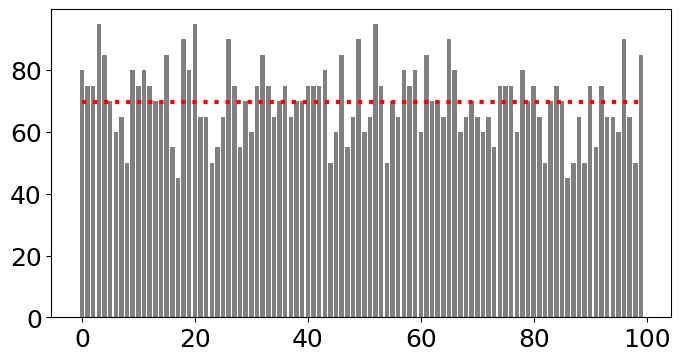

In [74]:
# CROSS VALIDATING

E = np.zeros(100)

for jj in range(100):
    r1 = np.random.permutation(80)
    r2 = np.random.permutation(80)
    ind1 = r1[:60]
    ind2 = r2[:60]+60
    ind1t = r1[60:80]
    ind2t = r2[60:80]+60
    
    xtrain = np.concatenate((v[ind1[:,np.newaxis], np.array([1,3])], v[ind2[:,np.newaxis], np.array([1,3])])) 
    test = np.concatenate((v[ind1t[:,np.newaxis], np.array([1,3])], v[ind2t[:,np.newaxis], np.array([1,3])])) 
    
    label = np.repeat(np.array([1,-1]),60)
    truth = np.repeat(np.array([1,-1]),20)
    
    lda = LinearDiscriminantAnalysis()
    test_class = lda.fit(xtrain, label).predict(test)
    
    E[jj] = 100*np.sum(np.abs(test_class - truth))/40

plt.bar(range(100), E, color = (0.5, 0.5, 0.5))
plt.plot(range(100), np.mean(E)*np.ones(100), 'r:', linewidth = 3)
plt.show()    
    

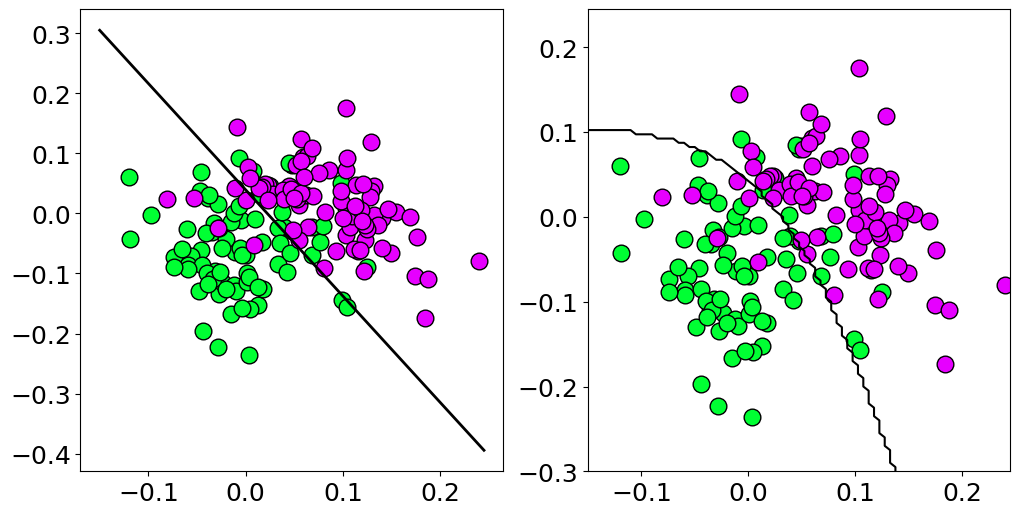

In [86]:
import warnings
warnings.filterwarnings('ignore')

dogdata_w_mat = io.loadmat("DATA/dogData_w.mat")
catdata_w_mat = io.loadmat("DATA/catData_w.mat")

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

plt.rcParams['figure.figsize'] = [12, 6]
fig,axs = plt.subplots(1,2)
for j in range(2):
    axs[j].plot(v[:80,1],v[:80,3],'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
    axs[j].plot(v[80:,1],v[80:,3],'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)

xtrain = np.concatenate((v[:60,np.array([1,3])],v[80:140,np.array([1,3])]))
test = np.concatenate((v[60:80,np.array([1,3])],v[140:160,np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)

# Linear discriminant
lda = LinearDiscriminantAnalysis().fit(xtrain, label)
test_class = lda.predict(test)

K = -lda.intercept_[0]
L = -lda.coef_[0]

x = np.arange(-0.15, 0.25, 0.005)
axs[0].plot(x, -(L[0]*x + K)/L[1], 'k', linewidth = 2)


# Quadratic discriminant
qda = QuadraticDiscriminantAnalysis().fit(xtrain, label)
y = np.arange(-0.3, 0.25, 0.005)
X, Y = np.meshgrid(x,y)

Z = np.zeros_like(X)

for jj in range(len(x)):
    for kk in range(len(y)):
        Z[kk,jj] = qda.predict(np.array([[x[jj],y[kk]]]))
        
axs[1].contour(X, Y, Z, 0, colors = 'k', linewidth = 2)

plt.show()


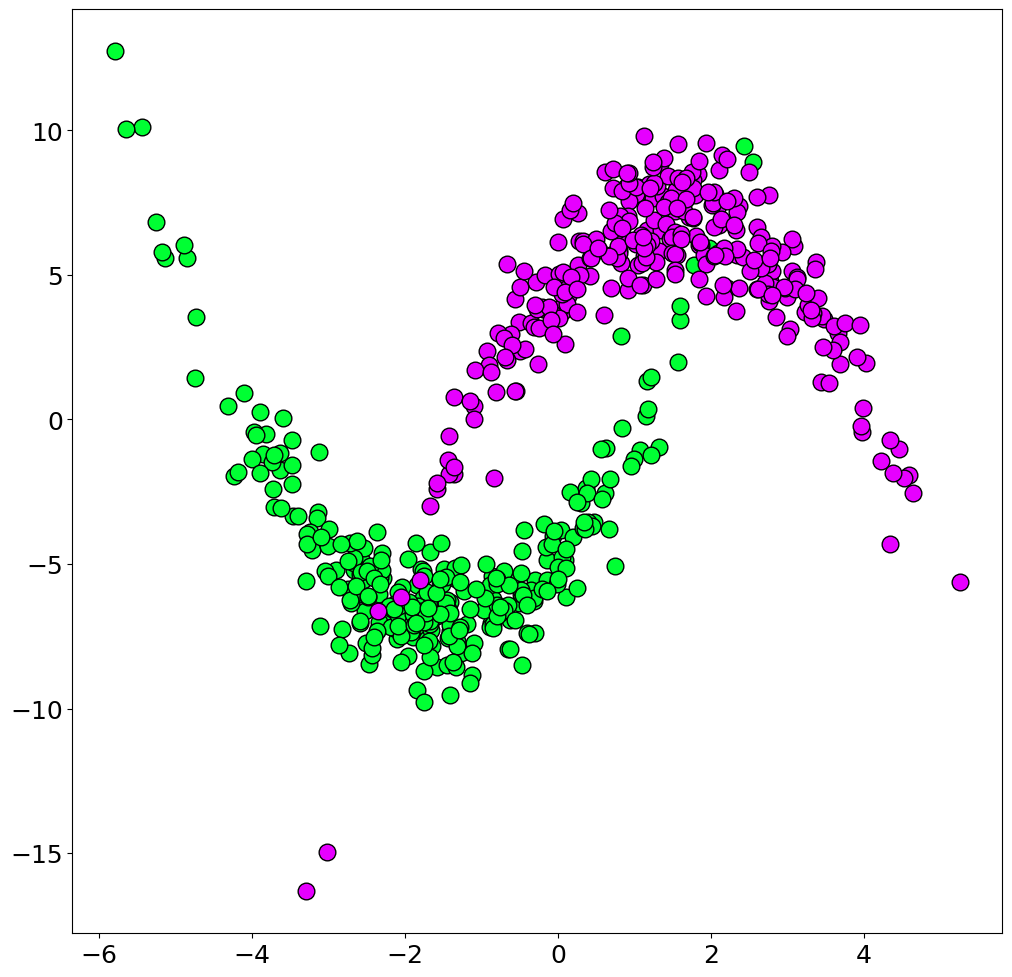

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn import svm
from sklearn.model_selection import cross_val_score
from mpl_toolkits import mplot3d

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size':18})

n1 = 300 # Training set size

x1 = 1.5*np.random.randn(n1) - 1.5
y1 = 1.2*np.random.randn(n1) + np.power(x1+1.5,2) - 7
x2 = 1.5*np.random.randn(n1) + 1.5
y2 = 1.2*np.random.randn(n1) - np.power(x2-1.5,2) + 7

plt.plot(x1,y1,'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
plt.plot(x2,y2,'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)

plt.show()

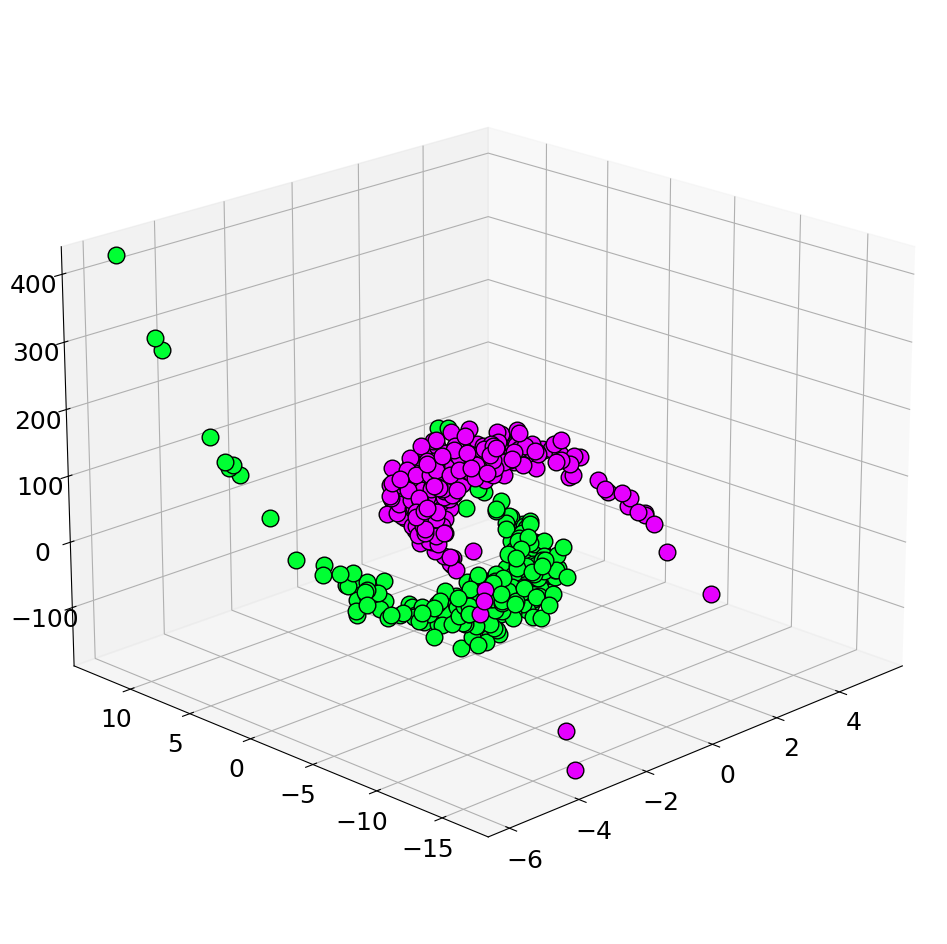

In [89]:
z1 = np.power(x1,2) * y1
z2 = np.power(x2,2) * y2

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x1,y1,z1,'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
ax.plot(x2,y2,z2,'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)

ax.view_init(20, -135)

plt.show()

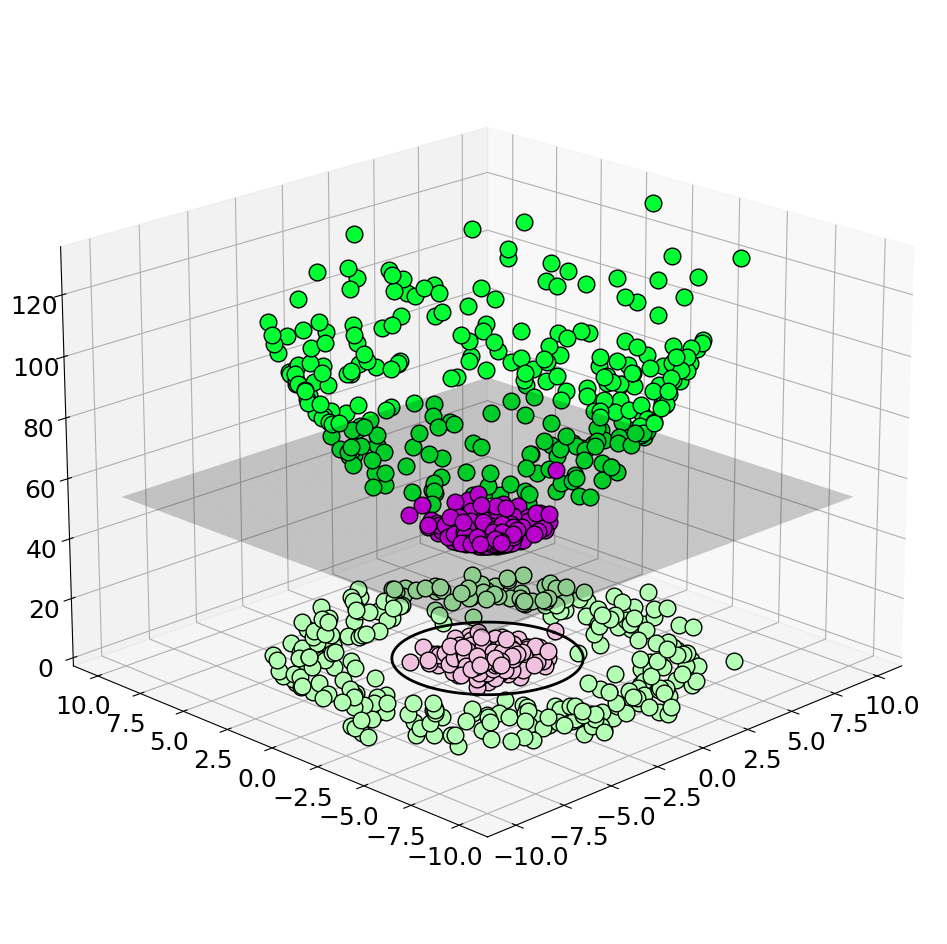

In [90]:
r = 7 + np.random.randn(n1)
th = 2 * np.pi * np.random.randn(n1)
xr = r * np.cos(th)
yr = r * np.sin(th)
x5 = np.random.randn(n1)
y5 = np.random.randn(n1)

zr = np.power(xr,2) + np.power(yr,2)
z5 = np.power(x5,2) + np.power(y5,2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, -135)

ax.plot(xr,yr,zr+40,'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
ax.plot(x5,y5,z5+40,'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)


x = np.arange(-10,10.5,0.5)
y = x
X,Y = np.meshgrid(x,y)
F3 = 54 + 0*X + 0*Y

ax.plot_surface(X, Y, F3, cmap='gray',linewidth=0, antialiased=True,alpha=0.2)

ax.plot(xr,yr,np.zeros(*xr.shape),'ro',markerfacecolor=(179/255,1,179/255),markeredgecolor='k',ms=12)
ax.plot(x5,y5,np.zeros(*x5.shape),'bo',markerfacecolor=(240/255,194/255,224/255),markeredgecolor='k',ms=12)

theta = np.linspace(0,2*np.pi,100)
xrr = np.sqrt(14)*np.cos(theta)
yrr = np.sqrt(14)*np.sin(theta)

ax.plot(xrr,yrr,np.zeros(*xrr.shape),'k-',linewidth=2)

plt.show()

[0.91666667 0.91666667 1.         1.         0.91666667 1.
 1.         0.75       0.83333333 0.91666667]
0.07499999999999996


<BarContainer object of 40 artists>

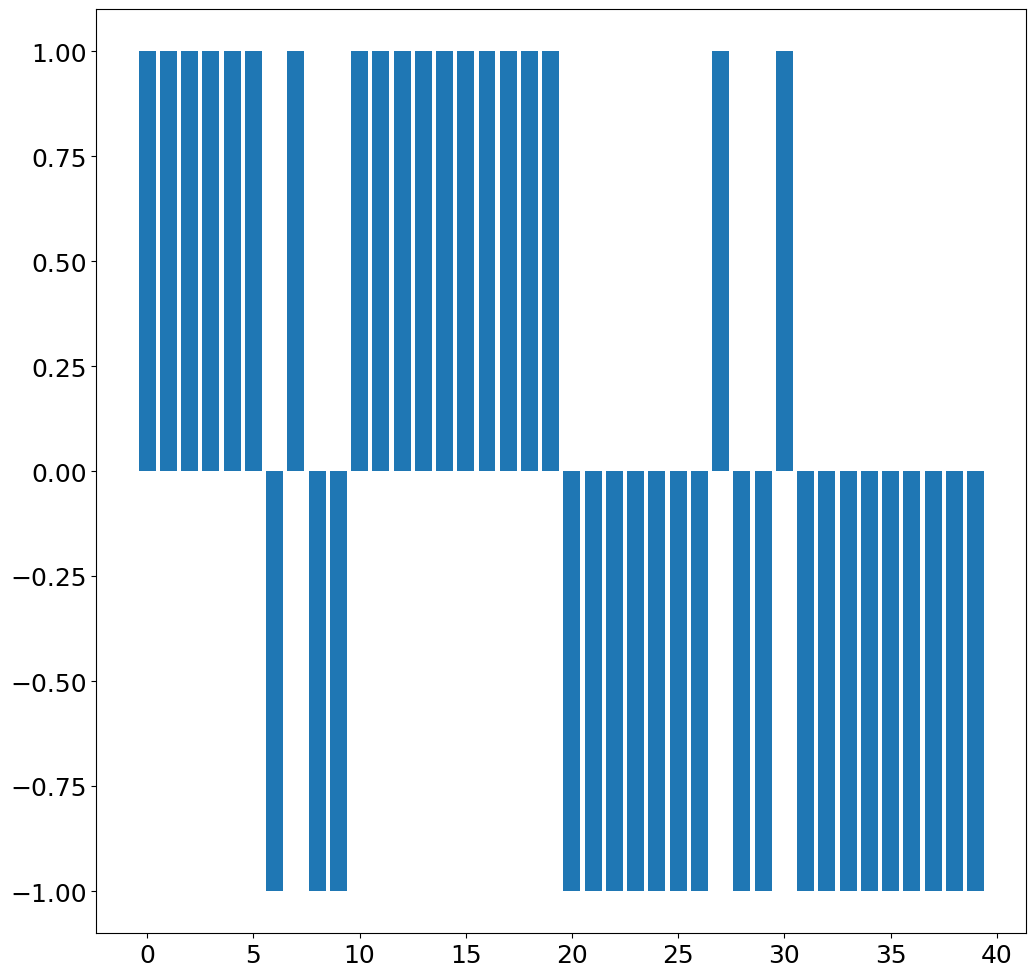

In [105]:
# Classify dogs vs. cats
dogdata_w_mat = io.loadmat("DATA/dogData_w.mat")
catdata_w_mat = io.loadmat("DATA/catData_w.mat")

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

features = np.arange(1,21)
xtrain = np.concatenate((v[:60,features],v[80:140,features]))
test = np.concatenate((v[60:80,features],v[140:160,features]))

label = np.repeat(np.array([1,-1]),60)
truth = np.repeat(np.array([1,-1]),20)


Mdl = svm.SVC(kernel = 'rbf', gamma = 'auto').fit(xtrain, label)
test_labels = Mdl.predict(test)

CMdl = cross_val_score(Mdl, xtrain, label, cv = 10)
classLoss = 1 - np.mean(CMdl)

print(CMdl)
print(classLoss)

fig, axs = plt.subplots(1)
axs.bar(range(len(test_labels)),test_labels)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn import tree, preprocessing
from sklearn.model_selection import cross_val_score
from IPython.display import Image  
from io import StringIO  
import pydotplus
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.tree import plot_tree

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]


fisheriris_mat = io.loadmat("DATA/fisheriris.mat")
meas = fisheriris_mat['meas']
species = fisheriris_mat['species']
le = preprocessing.LabelEncoder()
le.fit(species.reshape(-1).tolist())
species_label = le.transform(species.reshape(-1).tolist())

decision_tree = tree.DecisionTreeClassifier(max_depth = 3).fit(meas, species_label)

dot_data = StringIO()

tree.export_graphviz(decision_tree, out_file = dot_data, 
                     filled = True, rounded = True, special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

# filename = 'ee.png'
# graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(100, 200))
# plt.imshow(img, interpolation='nearest')

cv = cross_val_score(decision_tree, meas, species_label, cv = 10)
classError = 1- np.mean(cv)

print(cv)

print(classError)

[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
0.040000000000000036


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


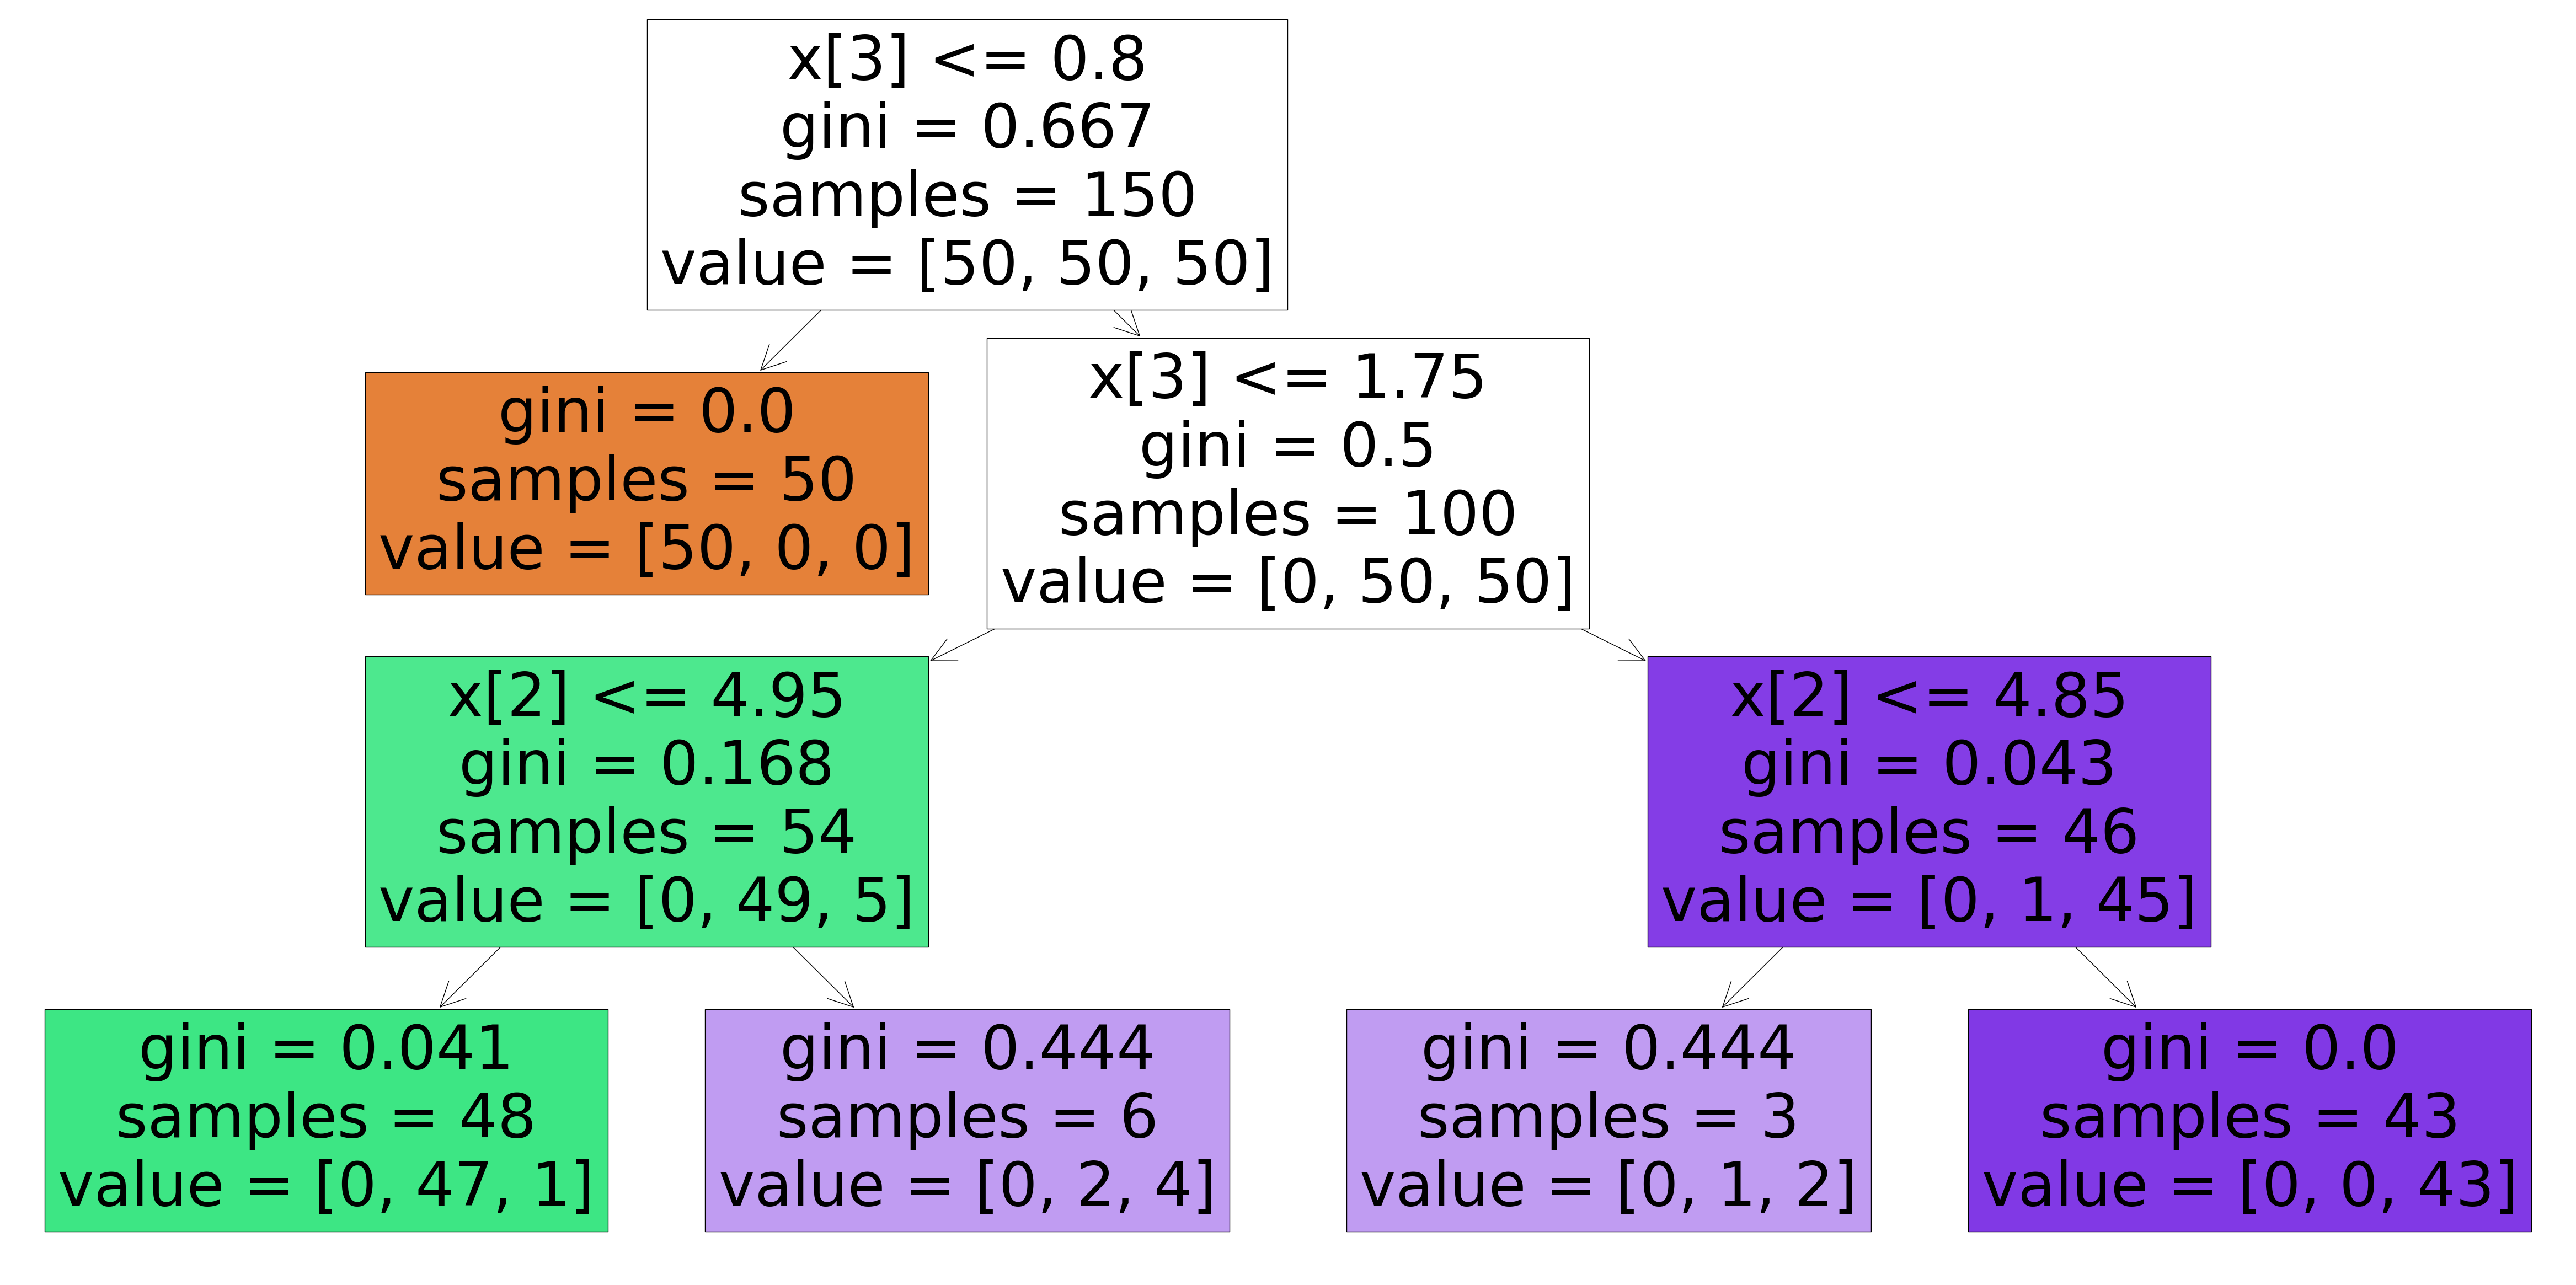

In [7]:
plt.figure(figsize=(60,30))
plot_tree(decision_tree, filled=True);


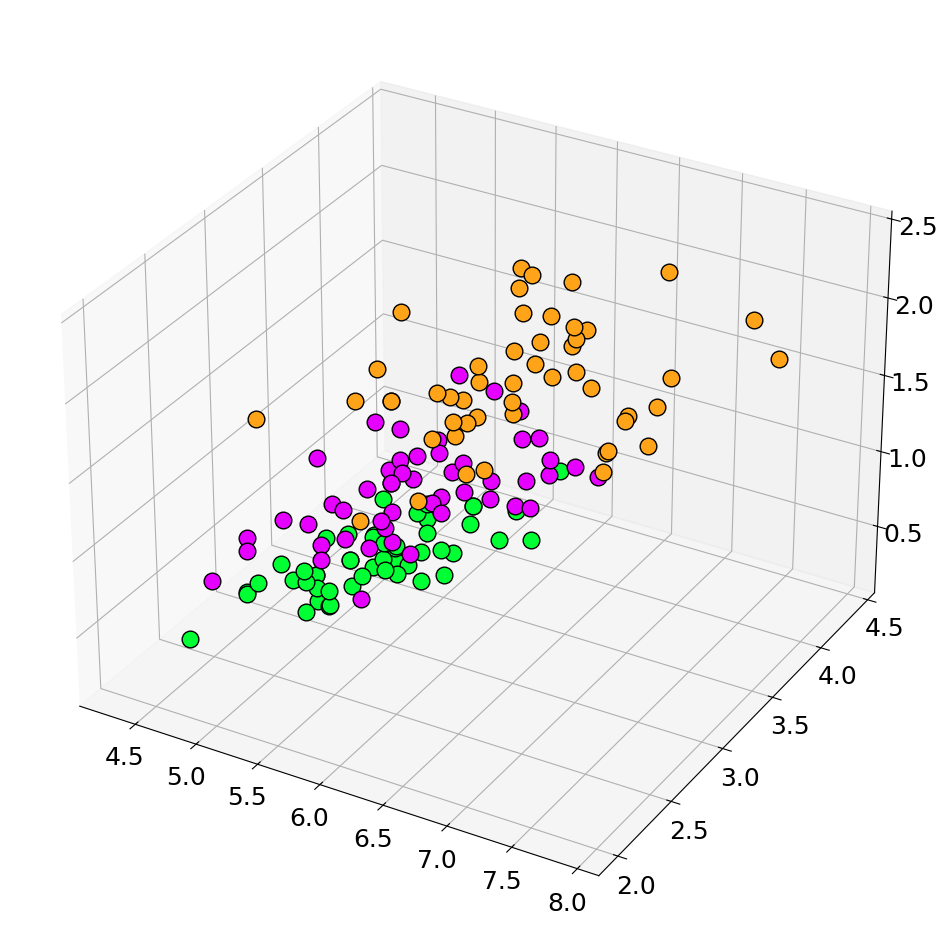

In [11]:
x1 = meas[:50,:]     # setosa
x2 = meas[50:100,:]  # versicolor
x3 = meas[100:150,:] # virginica

fig = plt.figure()
ax = plt.subplot(111,projection='3d')
ax.plot(x1[:,0],x1[:,1],x1[:,3],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
ax.plot(x2[:,0],x2[:,1],x2[:,3],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)
ax.plot(x3[:,0],x3[:,1],x3[:,3],'o',markerfacecolor=(1,0.64,0.098),markeredgecolor='k',ms=12)

plt.show()

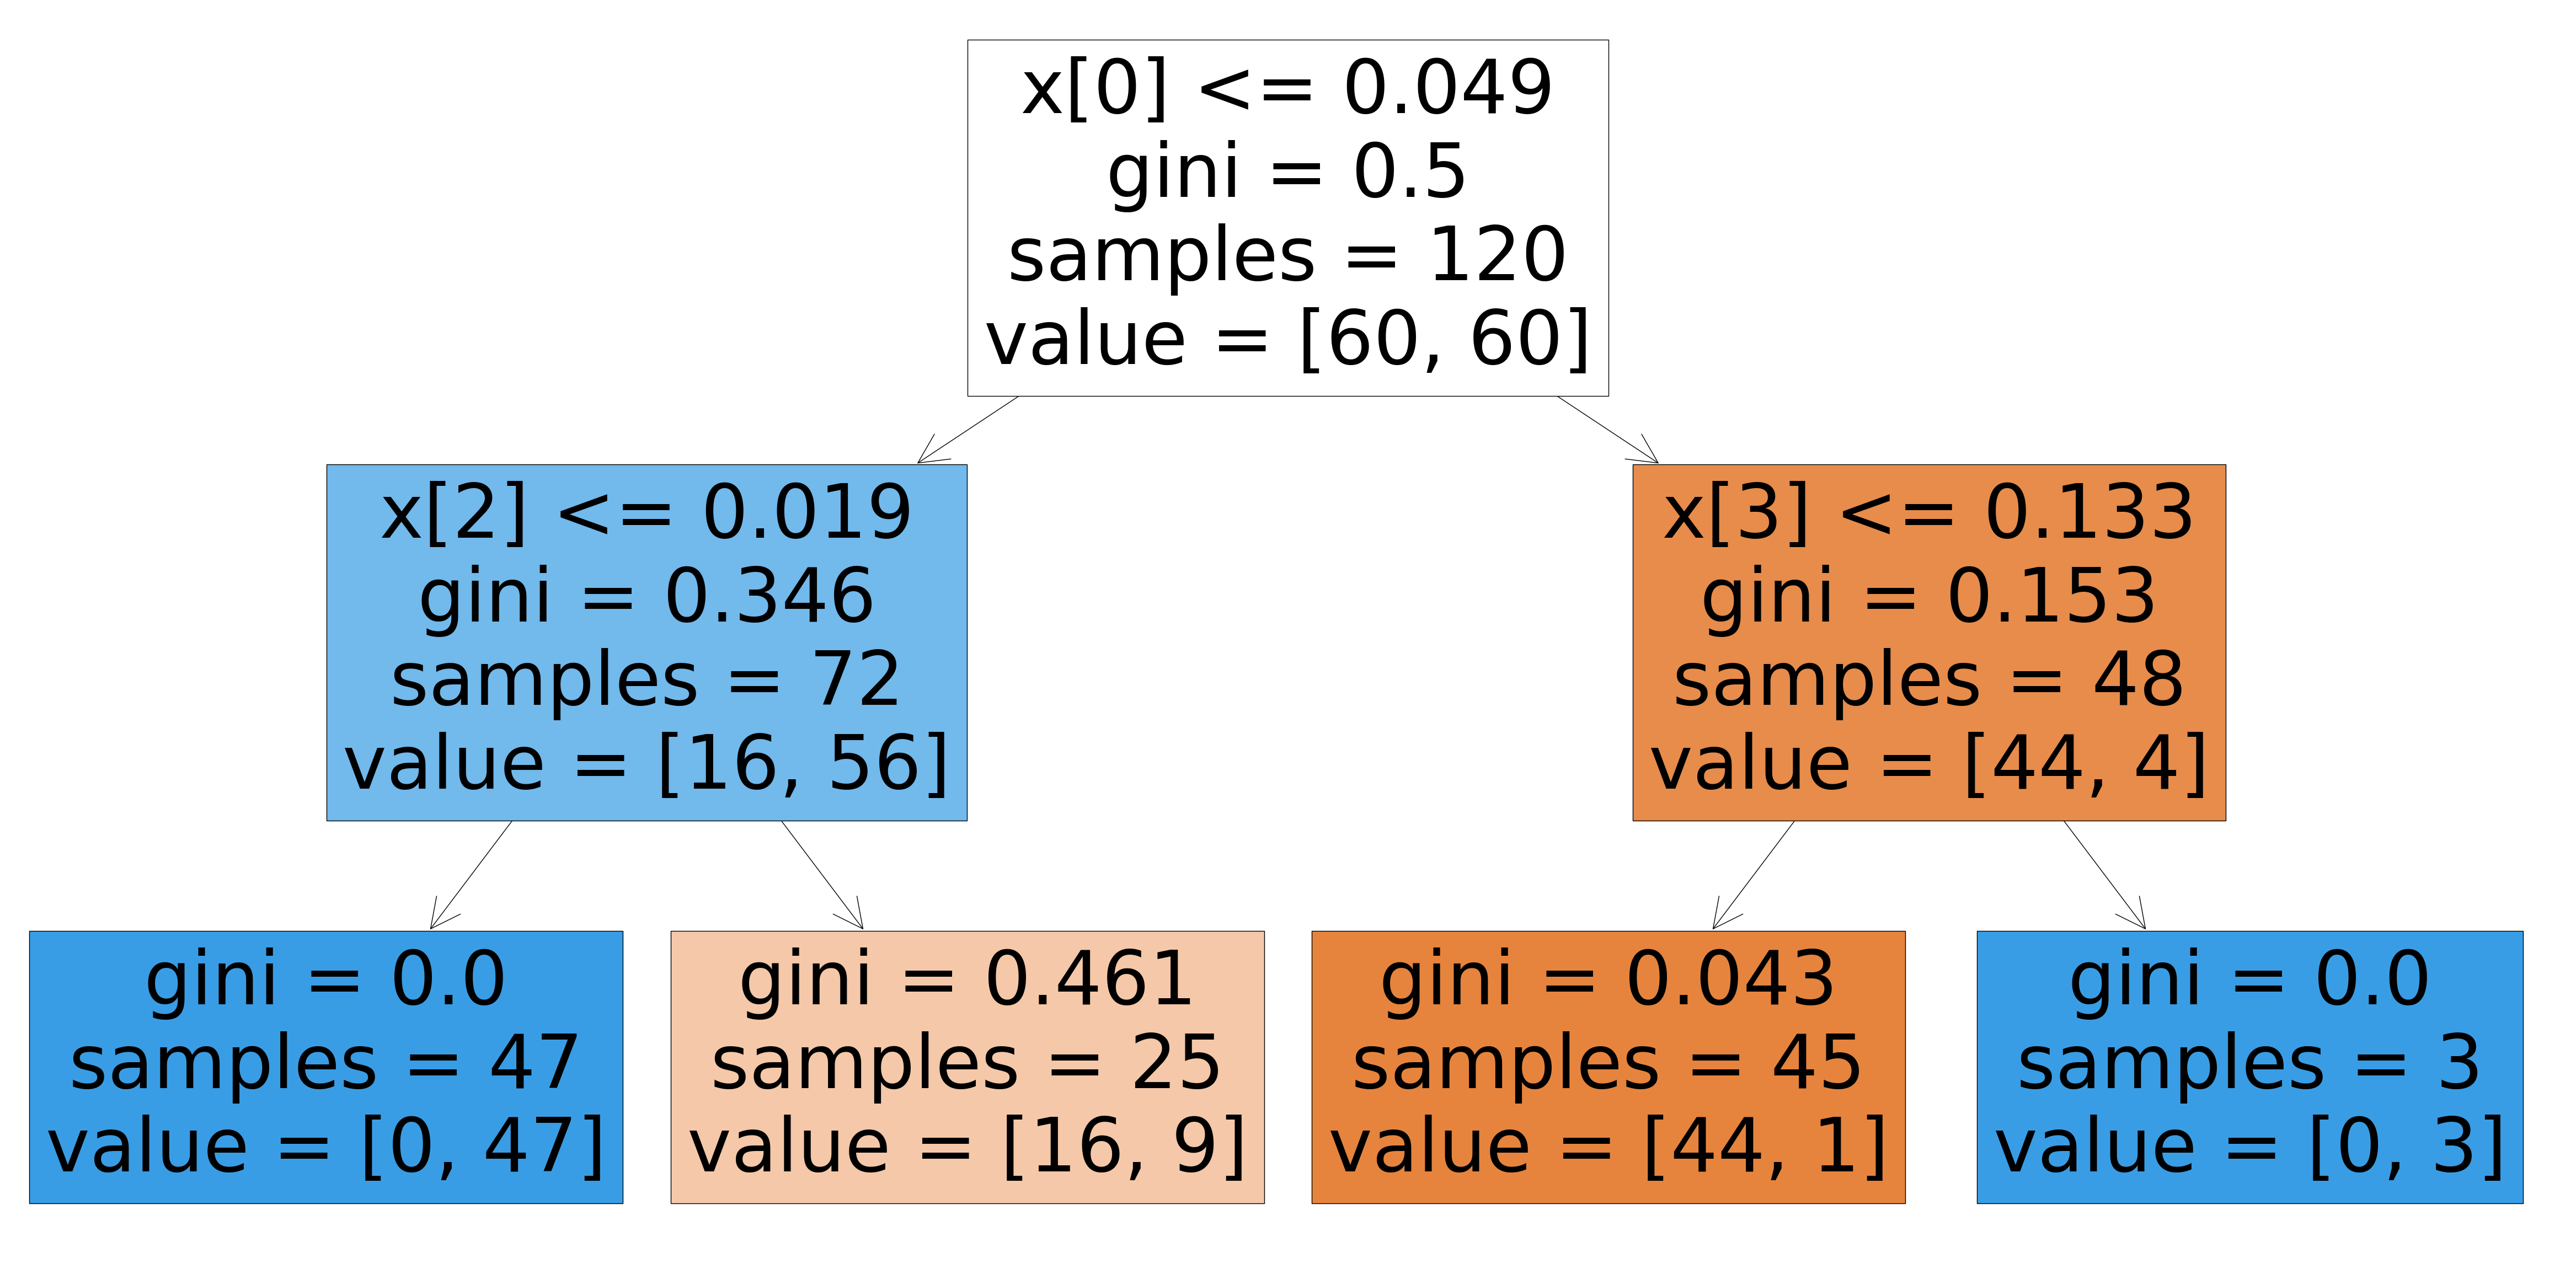

In [13]:
# dogs vs. cats
dogdata_w_mat = io.loadmat("DATA/dogData_w.mat")
catdata_w_mat = io.loadmat("DATA/catData_w.mat")

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

features = np.arange(1,21)
xtrain = np.concatenate((v[:60,features],v[80:140,features]))
test = np.concatenate((v[60:80,features],v[140:160,features]))

label = np.repeat(np.array([1,-1]),60)
truth = np.repeat(np.array([1,-1]),20)

Mdl = tree.DecisionTreeClassifier(max_depth=2).fit(xtrain,label)
cv = cross_val_score(Mdl, xtrain, label, cv=10) #cross-validate the model
classError = 1-np.mean(cv) # average error over all cross-validation iterations

# dot_data = StringIO()

# tree.export_graphviz(Mdl, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

plt.figure(figsize=(60,30))
plot_tree(Mdl, filled=True);


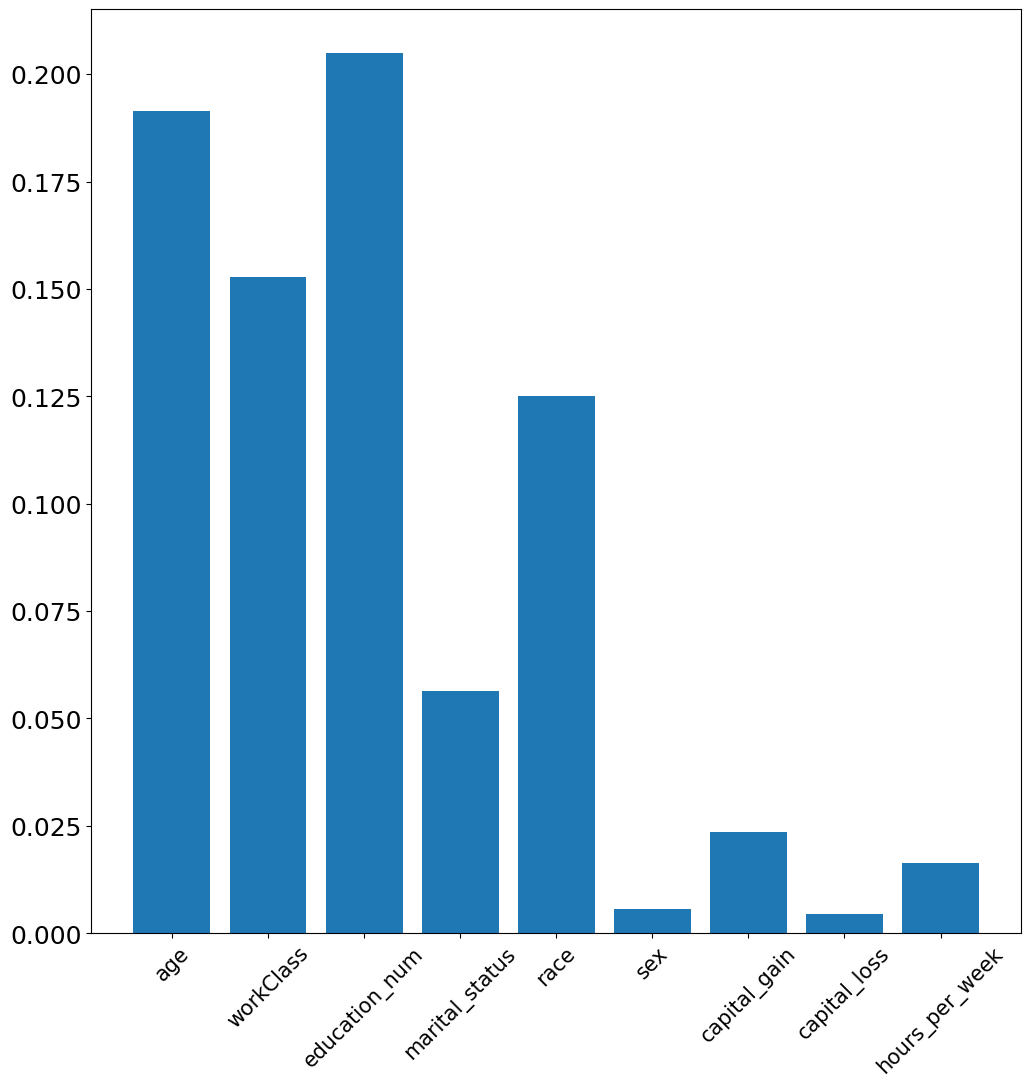

In [15]:
## Census Data
adultdata = pd.read_csv("DATA/census1994.csv")

adultdata = adultdata.loc[:,('age','workClass','education_num','marital_status','race','sex','capital_gain','capital_loss','hours_per_week','salary')]

nFeatures = len(adultdata.columns)-1

# convert categorical variables to one-hot representation
adultdata = pd.get_dummies(adultdata, columns=['workClass', 'marital_status', 'race', 'sex', 'salary'])

adultdata_input = adultdata.drop(['salary_>50K','salary_<=50K'],axis=1)
adultdata_salary = adultdata['salary_>50K']

Mdl = tree.DecisionTreeClassifier(max_features=10).fit(adultdata_input,adultdata_salary)
imp = Mdl.feature_importances_
imp_combine = np.zeros(nFeatures)
imp_combine[:5] = imp[:5]
imp_combine[5] = np.mean(imp[5:14])
imp_combine[6] = np.mean(imp[14:21])
imp_combine[7] = np.mean(imp[21:26])
imp_combine[8] = np.mean(imp[26:28])

plt.bar(range(len(imp_combine)),imp_combine)
infeatures = ['age','workClass','education_num', 'marital_status', 'race', 'sex', 'capital_gain','capital_loss','hours_per_week']
plt.xticks(range(len(infeatures)), infeatures, size='small',rotation=45)
plt.show()


# plt.figure(figsize=(60,30))
# plot_tree(Mdl, filled=True);

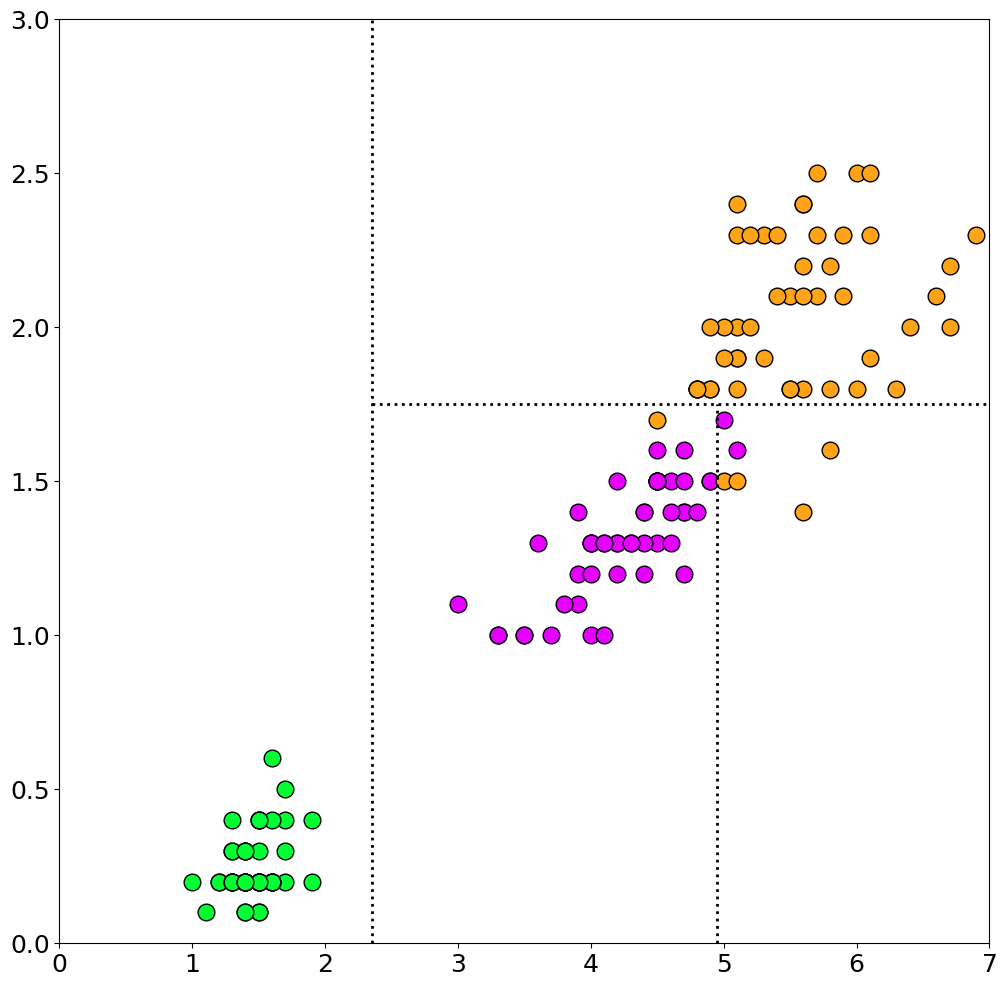

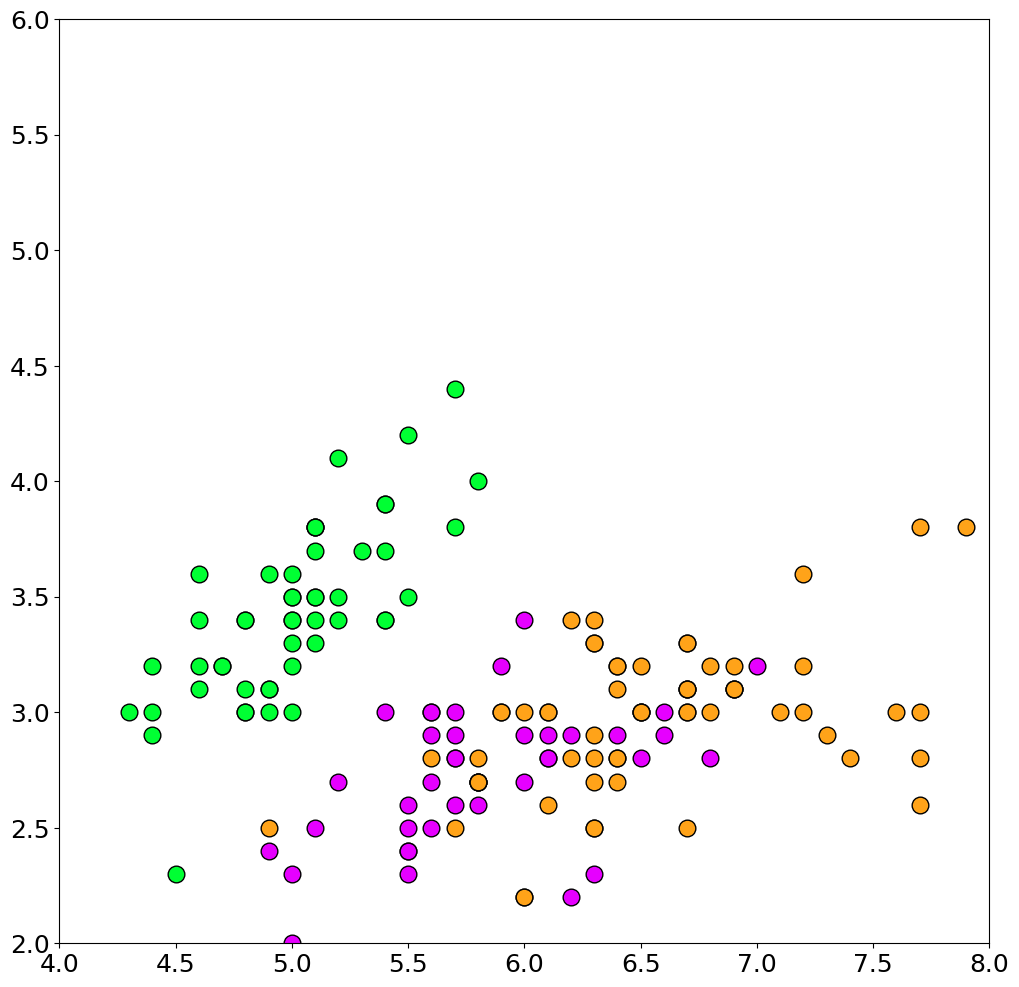

In [18]:
## Splitting Procedure
fisheriris_mat = io.loadmat("DATA/fisheriris.mat")
meas = fisheriris_mat['meas']
species = fisheriris_mat['species']

x1 = meas[:50,:]     # setosa
x2 = meas[50:100,:]  # versicolor
x3 = meas[100:150,:] # virginica

plt.plot(x1[:,2],x1[:,3],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
plt.plot(x2[:,2],x2[:,3],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)
plt.plot(x3[:,2],x3[:,3],'o',markerfacecolor=(1,0.64,0.098),markeredgecolor='k',ms=12)

plt.plot(np.array([2.35, 2.35]),np.array([0, 3]),'k:',linewidth=2)
plt.plot(np.array([2.35, 10]),np.array([1.75, 1.75]),'k:',linewidth=2)
plt.plot(np.array([4.95, 4.95]),np.array([0, 1.75]),'k:',linewidth=2)

plt.xlim(0,7)
plt.ylim(0,3)

plt.show()

plt.plot(x1[:,0],x1[:,1],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
plt.plot(x2[:,0],x2[:,1],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)
plt.plot(x3[:,0],x3[:,1],'o',markerfacecolor=(1,0.64,0.098),markeredgecolor='k',ms=12)

plt.xlim(4,8)
plt.ylim(2,6)

plt.show()